<a href="https://colab.research.google.com/github/guptadarsh/A-top-delivery-company/blob/main/FECS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Business Problem**
- Company aims to establish itself as the premier player in the logistics industry. This case study is of paramount importance as it aligns with the company's core objectives and operational excellence.
- It provides a practical framework for understanding and processing data, which is integral to their operations. By leveraging data engineering pipelines and data analysis techniques, Delhivery can achieve several critical goals.
- First, it allows them to ensure data integrity and quality by addressing missing values and structuring the dataset appropriately.
- Second, it enables the extraction of valuable features from raw data, which can be utilized for building accurate forecasting models.
- Moreover, it facilitates the identification of patterns, insights, and actionable recommendations crucial for optimizing their logistics operations.
- By conducting hypothesis testing and outlier detection, Company can refine their processes and further enhance the quality of service they provide.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as spy

In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
df.head()

data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

                od_start_time  ...            cutoff_timestamp  \
0  2018-09-20 03:21:32.418600  ...         2018-09-20 04:27:55   
1  2018-09-20 03:21:32.418600  ...         2018-09-20 04:17:55   
2  2018-09-20 03:21:32.418600  ...  2018-09-20 04:01:19.505586   
3  2018-09-20 03:21:32.418600  ...         2018-09-20 03:39:57   
4  2018-09-20 03:21:32.418600  ...         2018-09-20 03:33:55   

   actual_distance_to_destination  actual_time  osrm_time osrm_distance  \
0                       10.435660         14.0       11.0       11.9653   
1                       18.936842         24.0       20.0       21.7243   
2                       27.637279         40.0       28.0       32.5395   
3                       36.118028         62.0       40.0       45.5620   
4                       39.386040         68.0       44.0       54.2181   

     factor  segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0  1.272727                 14.0               11.0                11.9653   
1  1.200000                 10.0                9.0                 9.7590   
2  1.428571                 16.0                7.0                10.8152   
3  1.550000                 21.0               12.0                13.0224   
4  1.545455                  6.0                5.0                 3.9153   

   segment_factor  
0        1.272727  
1        1.111111  
2        2.285714  
3        1.750000  
4        1.200000  

[5 rows x 24 columns]

In [ ]:
df.tail()

data          trip_creation_time  \
144862  training  2018-09-20 16:24:28.436231   
144863  training  2018-09-20 16:24:28.436231   
144864  training  2018-09-20 16:24:28.436231   
144865  training  2018-09-20 16:24:28.436231   
144866  training  2018-09-20 16:24:28.436231   

                                      route_schedule_uuid route_type  \
144862  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   
144863  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   
144864  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   
144865  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   
144866  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   

                      trip_uuid source_center                 source_name  \
144862  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144863  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144864  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144865  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144866  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   

       destination_center               destination_name  \
144862       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144863       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144864       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144865       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144866       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   

                     od_start_time  ...            cutoff_timestamp  \
144862  2018-09-20 16:24:28.436231  ...         2018-09-20 21:57:20   
144863  2018-09-20 16:24:28.436231  ...         2018-09-20 21:31:18   
144864  2018-09-20 16:24:28.436231  ...         2018-09-20 21:11:18   
144865  2018-09-20 16:24:28.436231  ...         2018-09-20 20:53:19   
144866  2018-09-20 16:24:28.436231  ...  2018-09-20 16:24:28.436231   

        actual_distance_to_destination  actual_time  osrm_time osrm_distance  \
144862                       45.258278         94.0       60.0       67.9280   
144863                       54.092531        120.0       76.0       85.6829   
144864                       66.163591        140.0       88.0       97.0933   
144865                       73.680667        158.0       98.0      111.2709   
144866                       70.039010        426.0       95.0       88.7319   

          factor  segment_actual_time  segment_osrm_time  \
144862  1.566667                 12.0               12.0   
144863  1.578947                 26.0               21.0   
144864  1.590909                 20.0               34.0   
144865  1.612245                 17.0               27.0   
144866  4.484211                268.0                9.0   

        segment_osrm_distance  segment_factor  
144862                 8.1858        1.000000  
144863                17.3725        1.238095  
144864                20.7053        0.588235  
144865                18.8885        0.629630  
144866                 8.8088       29.777778  

[5 rows x 24 columns]

In [ ]:
df.shape

(144867, 24)

In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
np.any(df.isnull())

True

In [ ]:
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [ ]:
df.describe()

start_scan_to_end_scan  cutoff_factor  actual_distance_to_destination  \
count           144867.000000  144867.000000                   144867.000000   
mean               961.262986     232.926567                      234.073372   
std               1037.012769     344.755577                      344.990009   
min                 20.000000       9.000000                        9.000045   
25%                161.000000      22.000000                       23.355874   
50%                449.000000      66.000000                       66.126571   
75%               1634.000000     286.000000                      286.708875   
max               7898.000000    1927.000000                     1927.447705   

         actual_time      osrm_time  osrm_distance         factor  \
count  144867.000000  144867.000000  144867.000000  144867.000000   
mean      416.927527     213.868272     284.771297       2.120107   
std       598.103621     308.011085     421.119294       1.715421   
min         9.000000       6.000000       9.008200       0.144000   
25%        51.000000      27.000000      29.914700       1.604264   
50%       132.000000      64.000000      78.525800       1.857143   
75%       513.000000     257.000000     343.193250       2.213483   
max      4532.000000    1686.000000    2326.199100      77.387097   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  \
count        144867.000000      144867.000000           144867.00000   
mean             36.196111          18.507548               22.82902   
std              53.571158          14.775960               17.86066   
min            -244.000000           0.000000                0.00000   
25%              20.000000          11.000000               12.07010   
50%              29.000000          17.000000               23.51300   
75%              40.000000          22.000000               27.81325   
max            3051.000000        1611.000000             2191.40370   

       segment_factor  
count   144867.000000  
mean         2.218368  
std          4.847530  
min        -23.444444  
25%          1.347826  
50%          1.684211  
75%          2.250000  
max        574.250000

In [ ]:
df.describe(include = 'object')

data          trip_creation_time  \
count     144867                      144867   
unique         2                       14817   
top     training  2018-09-28 05:23:15.359220   
freq      104858                         101   

                                      route_schedule_uuid route_type  \
count                                              144867     144867   
unique                                               1504          2   
top     thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...        FTL   
freq                                                 1812      99660   

                      trip_uuid source_center                    source_name  \
count                    144867        144867                         144574   
unique                    14817          1508                           1498   
top     trip-153811219535896559  IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
freq                        101         23347                          23347   

       destination_center               destination_name  \
count              144867                         144606   
unique               1481                           1468   
top          IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
freq                15192                          15192   

                     od_start_time                 od_end_time  \
count                       144867                      144867   
unique                       26369                       26369   
top     2018-09-21 18:37:09.322207  2018-09-24 09:59:15.691618   
freq                            81                          81   

           cutoff_timestamp  
count                144867  
unique                93180  
top     2018-09-24 05:19:20  
freq                     40

In [ ]:
unknown_fields = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
df = df.drop(columns = unknown_fields)

In [ ]:
for i  in df.columns:
  print(f"Unique entries for column {i:<30} = {df[i].nunique()}")

Unique entries for column data                           = 2
Unique entries for column trip_creation_time             = 14817
Unique entries for column route_schedule_uuid            = 1504
Unique entries for column route_type                     = 2
Unique entries for column trip_uuid                      = 14817
Unique entries for column source_center                  = 1508
Unique entries for column source_name                    = 1498
Unique entries for column destination_center             = 1481
Unique entries for column destination_name               = 1468
Unique entries for column od_start_time                  = 26369
Unique entries for column od_end_time                    = 26369
Unique entries for column start_scan_to_end_scan         = 1915
Unique entries for column actual_distance_to_destination = 144515
Unique entries for column actual_time                    = 3182
Unique entries for column osrm_time                      = 1531
Unique entries for column osrm_distance 

In [ ]:
df['data'] = df['data'].astype('category')
df['route_type'] = df['route_type'].astype('category')

In [ ]:
floating_columns = ['actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']

for i in floating_columns:
  print(df[i].max())

1927.4477046975032
4532.0
1686.0
2326.1991000000003
3051.0
1611.0
2191.4037000000003


In [ ]:
for i in floating_columns:
    df[i] = df[i].astype('float32')

In [ ]:
datetime_columns = ['trip_creation_time', 'od_start_time', 'od_end_time']
for i in datetime_columns:
    df[i] = pd.to_datetime(df[i])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

***Earlier the dataset was using 25.6+ MB of memory but now it has been reduced to 15.2 + MB. Around 40.63 % reduction in the memory usage.***

In [ ]:
df['trip_creation_time'].min(), df['od_end_time'].max()

(Timestamp('2018-09-12 00:00:16.535741'),
 Timestamp('2018-10-08 03:00:24.353479'))

In [ ]:
np.any(df.isnull())

True

In [ ]:
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

In [ ]:
missing_source_name = df.loc[df['source_name'].isnull(), 'source_center'].unique()
missing_source_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [ ]:
for i in missing_source_name:
  unique_source_name = df.loc[df['source_center'] == i, 'source_name'].unique()
  if pd.isna(unique_source_name):
     print("Source Center :", i, "-" * 10, "Source Name :", 'Not Found')
  else:
    print("Source Center :", i, "-" * 10, "Source Name :", unique_source_name)

Source Center : IND342902A1B ---------- Source Name : Not Found
Source Center : IND577116AAA ---------- Source Name : Not Found
Source Center : IND282002AAD ---------- Source Name : Not Found
Source Center : IND465333A1B ---------- Source Name : Not Found
Source Center : IND841301AAC ---------- Source Name : Not Found
Source Center : IND509103AAC ---------- Source Name : Not Found
Source Center : IND126116AAA ---------- Source Name : Not Found
Source Center : IND331022A1B ---------- Source Name : Not Found
Source Center : IND505326AAB ---------- Source Name : Not Found
Source Center : IND852118A1B ---------- Source Name : Not Found


In [ ]:
missing_destination_name = df.loc[df['destination_name'].isnull(), 'destination_center'].unique()
missing_destination_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [ ]:
for i in missing_source_name:
    unique_destination_name = df.loc[df['destination_center'] == i, 'destination_name'].unique()
    if (pd.isna(unique_source_name)) or (unique_source_name.size == 0):
        print("Destination Center :", i, "-" * 10, "Destination Name :", 'Not Found')
    else :
        print("Destination Center :", i, "-" * 10, "Destination Name :", unique_destination_name)

Destination Center : IND342902A1B ---------- Destination Name : Not Found
Destination Center : IND577116AAA ---------- Destination Name : Not Found
Destination Center : IND282002AAD ---------- Destination Name : Not Found
Destination Center : IND465333A1B ---------- Destination Name : Not Found
Destination Center : IND841301AAC ---------- Destination Name : Not Found
Destination Center : IND509103AAC ---------- Destination Name : Not Found
Destination Center : IND126116AAA ---------- Destination Name : Not Found
Destination Center : IND331022A1B ---------- Destination Name : Not Found
Destination Center : IND505326AAB ---------- Destination Name : Not Found
Destination Center : IND852118A1B ---------- Destination Name : Not Found


In [ ]:
np.all(df.loc[df['source_name'].isnull(), 'source_center'].isin(missing_destination_name))

False

In [ ]:
count = 1
for i in missing_destination_name:
    df.loc[df['destination_center'] == i, 'destination_name'] = df.loc[df['destination_center'] == i, 'destination_name'].replace(np.nan, f'location_{count}')
    count += 1

In [ ]:
d = {}
for i in missing_source_name:
    d[i] = df.loc[df['destination_center'] == i, 'destination_name'].unique()
for idx, val in d.items():
    if len(val) == 0:
        d[idx] = [f'location_{count}']
        count += 1
d2 = {}
for idx, val in d.items():
    d2[idx] = val[0]
for i, v in d2.items():
    print(i, v)

IND342902A1B location_1
IND577116AAA location_2
IND282002AAD location_3
IND465333A1B location_4
IND841301AAC location_5
IND509103AAC location_9
IND126116AAA location_8
IND331022A1B location_14
IND505326AAB location_6
IND852118A1B location_7


In [ ]:
for i in missing_source_name:
    df.loc[df['source_center'] == i, 'source_name'] = df.loc[df['source_center'] == i, 'source_name'].replace(np.nan, d2[i])

In [ ]:
df.describe()

trip_creation_time                  od_start_time  \
count                         144867                         144867   
mean   2018-09-22 13:34:23.659819264  2018-09-22 18:02:45.855230720   
min       2018-09-12 00:00:16.535741     2018-09-12 00:00:16.535741   
25%    2018-09-17 03:20:51.775845888  2018-09-17 08:05:40.886155008   
50%    2018-09-22 04:24:27.932764928  2018-09-22 08:53:00.116656128   
75%    2018-09-27 17:57:56.350054912  2018-09-27 22:41:50.285857024   
max       2018-10-03 23:59:42.701692     2018-10-06 04:27:23.392375   
std                              NaN                            NaN   

                         od_end_time  start_scan_to_end_scan  \
count                         144867           144867.000000   
mean   2018-09-23 10:04:31.395393024              961.262986   
min       2018-09-12 00:50:10.814399               20.000000   
25%    2018-09-18 01:48:06.410121984              161.000000   
50%    2018-09-23 03:13:03.520212992              449.000000   
75%    2018-09-28 12:49:06.054018048             1634.000000   
max       2018-10-08 03:00:24.353479             7898.000000   
std                              NaN             1037.012769   

       actual_distance_to_destination    actual_time      osrm_time  \
count                   144867.000000  144867.000000  144867.000000   
mean                       234.073380     416.927521     213.868286   
min                          9.000046       9.000000       6.000000   
25%                         23.355875      51.000000      27.000000   
50%                         66.126572     132.000000      64.000000   
75%                        286.708878     513.000000     257.000000   
max                       1927.447754    4532.000000    1686.000000   
std                        344.990021     598.103638     308.011078   

       osrm_distance  segment_actual_time  segment_osrm_time  \
count  144867.000000        144867.000000      144867.000000   
mean      284.771301            36.196110          18.507547   
min         9.008200          -244.000000           0.000000   
25%        29.914701            20.000000          11.000000   
50%        78.525803            29.000000          17.000000   
75%       343.193253            40.000000          22.000000   
max      2326.199219          3051.000000        1611.000000   
std       421.119293            53.571156          14.775960   

       segment_osrm_distance  
count          144867.000000  
mean               22.829018  
min                 0.000000  
25%                12.070100  
50%                23.513000  
75%                27.813250  
max              2191.403809  
std                17.860661

In [ ]:
df.describe(include = 'object')

route_schedule_uuid  \
count                                              144867   
unique                                               1504   
top     thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...   
freq                                                 1812   

                      trip_uuid source_center                    source_name  \
count                    144867        144867                         144867   
unique                    14817          1508                           1508   
top     trip-153811219535896559  IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
freq                        101         23347                          23347   

       destination_center               destination_name  
count              144867                         144867  
unique               1481                           1481  
top          IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)  
freq                15192                          15192

In [ ]:
grouping_1 = ['trip_uuid', 'source_center', 'destination_center']
df1 = df.groupby(by = grouping_1, as_index = False).agg({'data' : 'first',
                                                         'route_type' : 'first',
                                                       'trip_creation_time' : 'first',
                                                       'source_name' : 'first',
                                                       'destination_name' : 'last',
                                                       'od_start_time' : 'first',
                                                       'od_end_time' : 'first',
                                                       'start_scan_to_end_scan' : 'first',
                                                       'actual_distance_to_destination' : 'last',
                                                       'actual_time' : 'last',
                                                       'osrm_time' : 'last',
                                                       'osrm_distance' : 'last',
                                                       'segment_actual_time' : 'sum',
                                                       'segment_osrm_time' : 'sum',
                                                       'segment_osrm_distance' : 'sum'})
df1

trip_uuid source_center destination_center      data  \
0      trip-153671041653548748  IND209304AAA       IND000000ACB  training   
1      trip-153671041653548748  IND462022AAA       IND209304AAA  training   
2      trip-153671042288605164  IND561203AAB       IND562101AAA  training   
3      trip-153671042288605164  IND572101AAA       IND561203AAB  training   
4      trip-153671043369099517  IND000000ACB       IND160002AAC  training   
...                        ...           ...                ...       ...   
26363  trip-153861115439069069  IND628204AAA       IND627657AAA      test   
26364  trip-153861115439069069  IND628613AAA       IND627005AAA      test   
26365  trip-153861115439069069  IND628801AAA       IND628204AAA      test   
26366  trip-153861118270144424  IND583119AAA       IND583101AAA      test   
26367  trip-153861118270144424  IND583201AAA       IND583119AAA      test   

      route_type         trip_creation_time  \
0            FTL 2018-09-12 00:00:16.535741   
1            FTL 2018-09-12 00:00:16.535741   
2        Carting 2018-09-12 00:00:22.886430   
3        Carting 2018-09-12 00:00:22.886430   
4            FTL 2018-09-12 00:00:33.691250   
...          ...                        ...   
26363    Carting 2018-10-03 23:59:14.390954   
26364    Carting 2018-10-03 23:59:14.390954   
26365    Carting 2018-10-03 23:59:14.390954   
26366        FTL 2018-10-03 23:59:42.701692   
26367        FTL 2018-10-03 23:59:42.701692   

                              source_name  \
0      Kanpur_Central_H_6 (Uttar Pradesh)   
1      Bhopal_Trnsport_H (Madhya Pradesh)   
2       Doddablpur_ChikaDPP_D (Karnataka)   
3           Tumkur_Veersagr_I (Karnataka)   
4           Gurgaon_Bilaspur_HB (Haryana)   
...                                   ...   
26363  Tirchchndr_Shnmgprm_D (Tamil Nadu)   
26364   Peikulam_SriVnktpm_D (Tamil Nadu)   
26365        Eral_Busstand_D (Tamil Nadu)   
26366       Sandur_WrdN1DPP_D (Karnataka)   
26367                  Hospet (Karnataka)   

                            destination_name              od_start_time  \
0              Gurgaon_Bilaspur_HB (Haryana) 2018-09-12 16:39:46.858469   
1         Kanpur_Central_H_6 (Uttar Pradesh) 2018-09-12 00:00:16.535741   
2          Chikblapur_ShntiSgr_D (Karnataka) 2018-09-12 02:03:09.655591   
3          Doddablpur_ChikaDPP_D (Karnataka) 2018-09-12 00:00:22.886430   
4             Chandigarh_Mehmdpur_H (Punjab) 2018-09-14 03:40:17.106733   
...                                      ...                        ...   
26363  Thisayanvilai_UdnkdiRD_D (Tamil Nadu) 2018-10-04 02:29:04.272194   
26364    Tirunelveli_VdkkuSrt_I (Tamil Nadu) 2018-10-04 04:16:39.894872   
26365     Tirchchndr_Shnmgprm_D (Tamil Nadu) 2018-10-04 01:44:53.808000   
26366                 Bellary_Dc (Karnataka) 2018-10-04 03:58:40.726547   
26367          Sandur_WrdN1DPP_D (Karnataka) 2018-10-04 02:51:44.712656   

                     od_end_time  start_scan_to_end_scan  \
0     2018-09-13 13:40:23.123744                  1260.0   
1     2018-09-12 16:39:46.858469                   999.0   
2     2018-09-12 03:01:59.598855                    58.0   
3     2018-09-12 02:03:09.655591                   122.0   
4     2018-09-14 17:34:55.442454                   834.0   
...                          ...                     ...   
26363 2018-10-04 03:31:11.183797                    62.0   
26364 2018-10-04 05:47:45.162682                    91.0   
26365 2018-10-04 02:29:04.272194                    44.0   
26366 2018-10-04 08:46:09.166940                   287.0   
26367 2018-10-04 03:58:40.726547                    66.0   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                          383.759155        732.0      329.0     446.549591   
1                          440.973694        830.0      388.0     544.802673   
2                           24.644020         47.0       26.0      28.199400   
3                           48.542889         96

In [ ]:
df1['od_total_time'] = df1['od_end_time'] - df1['od_start_time']
df1.drop(columns = ['od_end_time', 'od_start_time'], inplace = True)
df1['od_total_time'] = df1['od_total_time'].apply(lambda x : round(x.total_seconds() / 60.0, 2))
df1['od_total_time'].head()

0    1260.60
1     999.51
2      58.83
3     122.78
4     834.64
Name: od_total_time, dtype: float64

In [ ]:
df2 = df1.groupby(by = 'trip_uuid', as_index = False).agg({'source_center' : 'first',
                                                           'destination_center' : 'last',
                                                           'data' : 'first',
                                                           'route_type' : 'first',
                                                           'trip_creation_time' : 'first',
                                                           'source_name' : 'first',
                                                           'destination_name' : 'last',
                                                           'od_total_time' : 'sum',
                                                           'start_scan_to_end_scan' : 'sum',
                                                           'actual_distance_to_destination' : 'sum',
                                                           'actual_time' : 'sum',
                                                           'osrm_time' : 'sum',
                                                           'osrm_distance' : 'sum',
                                                           'segment_actual_time' : 'sum',
                                                           'segment_osrm_time' : 'sum',
                                                           'segment_osrm_distance' : 'sum'})
df2

trip_uuid source_center destination_center      data  \
0      trip-153671041653548748  IND209304AAA       IND209304AAA  training   
1      trip-153671042288605164  IND561203AAB       IND561203AAB  training   
2      trip-153671043369099517  IND000000ACB       IND000000ACB  training   
3      trip-153671046011330457  IND400072AAB       IND401104AAA  training   
4      trip-153671052974046625  IND583101AAA       IND583119AAA  training   
...                        ...           ...                ...       ...   
14812  trip-153861095625827784  IND160002AAC       IND160002AAC      test   
14813  trip-153861104386292051  IND121004AAB       IND121004AAA      test   
14814  trip-153861106442901555  IND208006AAA       IND208006AAA      test   
14815  trip-153861115439069069  IND627005AAA       IND628204AAA      test   
14816  trip-153861118270144424  IND583119AAA       IND583119AAA      test   

      route_type         trip_creation_time  \
0            FTL 2018-09-12 00:00:16.535741   
1        Carting 2018-09-12 00:00:22.886430   
2            FTL 2018-09-12 00:00:33.691250   
3        Carting 2018-09-12 00:01:00.113710   
4            FTL 2018-09-12 00:02:09.740725   
...          ...                        ...   
14812    Carting 2018-10-03 23:55:56.258533   
14813    Carting 2018-10-03 23:57:23.863155   
14814    Carting 2018-10-03 23:57:44.429324   
14815    Carting 2018-10-03 23:59:14.390954   
14816        FTL 2018-10-03 23:59:42.701692   

                               source_name  \
0       Kanpur_Central_H_6 (Uttar Pradesh)   
1        Doddablpur_ChikaDPP_D (Karnataka)   
2            Gurgaon_Bilaspur_HB (Haryana)   
3                 Mumbai Hub (Maharashtra)   
4                   Bellary_Dc (Karnataka)   
...                                    ...   
14812       Chandigarh_Mehmdpur_H (Punjab)   
14813         FBD_Balabhgarh_DPC (Haryana)   
14814   Kanpur_GovndNgr_DC (Uttar Pradesh)   
14815  Tirunelveli_VdkkuSrt_I (Tamil Nadu)   
14816        Sandur_WrdN1DPP_D (Karnataka)   

                         destination_name  od_total_time  \
0      Kanpur_Central_H_6 (Uttar Pradesh)        2260.11   
1       Doddablpur_ChikaDPP_D (Karnataka)         181.61   
2           Gurgaon_Bilaspur_HB (Haryana)        3934.36   
3          Mumbai_MiraRd_IP (Maharashtra)         100.49   
4           Sandur_WrdN1DPP_D (Karnataka)         718.34   
...                                   ...            ...   
14812      Chandigarh_Mehmdpur_H (Punjab)         258.03   
14813      Faridabad_Blbgarh_DC (Haryana)          60.59   
14814  Kanpur_GovndNgr_DC (Uttar Pradesh)         422.12   
14815  Tirchchndr_Shnmgprm_D (Tamil Nadu)         348.52   
14816       Sandur_WrdN1DPP_D (Karnataka)         354.40   

       start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                      2259.0                      824.732849       1562.0   
1                       180.0                       73.186905        143.0   
2                      3933.0                     1927.404297       3347.0   
3                       100.0                       17.175274         59.0   
4                       717.0                      127.448502        341.0   
...                       ...                             ...          ...   
14812                   257.0                       57.762333         83.0   
14813                    60.0                       15.513784         21.0   
14814                   421.0                       38.684837        282.0   
14815                   347.0                      134.723831        264.0   
14816                   353.0                       66.081528        275.0   

       osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0          717.0     991.352295               1548.0             1008.0   
1           68.0      85.111000                141.0               65.0   
2         1740.0    2354.066650               3308.0             1941.0   
3           15.0    

In [ ]:
def location_name_to_state(x):
    l = x.split('(')
    if len(l) == 1:
        return l[0]
    else:
        return l[1].replace(')', "")

In [ ]:
def location_name_to_city(x):
    if 'location' in x:
        return 'unknown_city'
    else:
        l = x.split()[0].split('_')
        if 'CCU' in x:
            return 'Kolkata'
        elif 'MAA' in x.upper():
            return 'Chennai'
        elif ('HBR' in x.upper()) or ('BLR' in x.upper()):
            return 'Bengaluru'
        elif 'FBD' in x.upper():
            return 'Faridabad'
        elif 'BOM' in x.upper():
            return 'Mumbai'
        elif 'DEL' in x.upper():
            return 'Delhi'
        elif 'OK' in x.upper():
            return 'Delhi'
        elif 'GZB' in x.upper():
            return 'Ghaziabad'
        elif 'GGN' in x.upper():
            return 'Gurgaon'
        elif 'AMD' in x.upper():
            return 'Ahmedabad'
        elif 'CJB' in x.upper():
            return 'Coimbatore'
        elif 'HYD' in x.upper():
            return 'Hyderabad'
        return l[0]

In [ ]:
def location_name_to_place(x):
    if 'location' in x:
        return x
    elif 'HBR' in x:
        return 'HBR Layout PC'
    else:
        l = x.split()[0].split('_', 1)
        if len(l) == 1:
            return 'unknown_place'
        else:
            return l[1]

In [ ]:
df2['source_state'] = df2['source_name'].apply(location_name_to_state)
df2['source_state'].unique()

array(['Uttar Pradesh', 'Karnataka', 'Haryana', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana', 'Rajasthan',
       'Assam', 'Madhya Pradesh', 'West Bengal', 'Andhra Pradesh',
       'Punjab', 'Chandigarh', 'Goa', 'Jharkhand', 'Pondicherry',
       'Orissa', 'Uttarakhand', 'Himachal Pradesh', 'Kerala',
       'Arunachal Pradesh', 'Bihar', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Jammu & Kashmir', 'Mizoram', 'Nagaland',
       'location_9', 'location_3', 'location_2', 'location_14',
       'location_7'], dtype=object)

In [ ]:
df2['source_city'] = df2['source_name'].apply(location_name_to_city)
print('No of source cities :', df2['source_city'].nunique())
df2['source_city'].unique()[:100]

No of source cities : 690


array(['Kanpur', 'Doddablpur', 'Gurgaon', 'Mumbai', 'Bellary', 'Chennai',
       'Bengaluru', 'Surat', 'Delhi', 'Pune', 'Faridabad', 'Shirala',
       'Hyderabad', 'Thirumalagiri', 'Gulbarga', 'Jaipur', 'Allahabad',
       'Guwahati', 'Narsinghpur', 'Shrirampur', 'Madakasira', 'Sonari',
       'Dindigul', 'Jalandhar', 'Chandigarh', 'Deoli', 'Pandharpur',
       'Kolkata', 'Bhandara', 'Kurnool', 'Bhiwandi', 'Bhatinda',
       'RoopNagar', 'Bantwal', 'Lalru', 'Kadi', 'Shahdol', 'Gangakher',
       'Durgapur', 'Vapi', 'Jamjodhpur', 'Jetpur', 'Mehsana', 'Jabalpur',
       'Junagadh', 'Gundlupet', 'Mysore', 'Goa', 'Bhopal', 'Sonipat',
       'Himmatnagar', 'Jamshedpur', 'Pondicherry', 'Anand', 'Udgir',
       'Nadiad', 'Villupuram', 'Purulia', 'Bhubaneshwar', 'Bamangola',
       'Tiruppattur', 'Kotdwara', 'Medak', 'Bangalore', 'Dhrangadhra',
       'Hospet', 'Ghumarwin', 'Agra', 'Sitapur', 'Canacona', 'Bilimora',
       'SultnBthry', 'Lucknow', 'Vellore', 'Bhuj', 'Dinhata',
       'Margheri

In [ ]:
df2['source_place'] = df2['source_name'].apply(location_name_to_place)
df2['source_place'].unique()[:100]

array(['Central_H_6', 'ChikaDPP_D', 'Bilaspur_HB', 'unknown_place', 'Dc',
       'Poonamallee', 'Chrompet_DPC', 'HBR Layout PC', 'Central_D_12',
       'Lajpat_IP', 'North_D_3', 'Balabhgarh_DPC', 'Central_DPP_3',
       'Shamshbd_H', 'Xroad_D', 'Nehrugnj_I', 'Central_I_7',
       'Central_H_1', 'Nangli_IP', 'North', 'KndliDPP_D', 'Central_D_9',
       'DavkharRd_D', 'Bandel_D', 'RTCStand_D', 'Central_DPP_1',
       'KGAirprt_HB', 'North_D_2', 'Central_D_1', 'DC', 'Mthurard_L',
       'Mullanpr_DC', 'Central_DPP_2', 'RajCmplx_D', 'Beliaghata_DPC',
       'RjnaiDPP_D', 'AbbasNgr_I', 'Mankoli_HB', 'DPC', 'Airport_H',
       'Hub', 'Gateway_HB', 'Tathawde_H', 'ChotiHvl_DC', 'Trmltmpl_D',
       'OnkarDPP_D', 'Mehmdpur_H', 'KaranNGR_D', 'Sohagpur_D',
       'Chrompet_L', 'Busstand_D', 'Central_I_1', 'IndEstat_I', 'Court_D',
       'Panchot_IP', 'Adhartal_IP', 'DumDum_DPC', 'Bomsndra_HB',
       'Swamylyt_D', 'Yadvgiri_IP', 'Old', 'Kundli_H', 'Central_I_3',
       'Vasanthm_I', 'Poonamallee_

In [ ]:
df2['destination_state'] = df2['destination_name'].apply(location_name_to_state)
df2['destination_state'].head(10)

0    Uttar Pradesh
1        Karnataka
2          Haryana
3      Maharashtra
4        Karnataka
5       Tamil Nadu
6       Tamil Nadu
7        Karnataka
8          Gujarat
9            Delhi
Name: destination_state, dtype: object

In [ ]:
df2['destination_city'] = df2['destination_name'].apply(location_name_to_city)
df2['destination_city'].head()

0        Kanpur
1    Doddablpur
2       Gurgaon
3        Mumbai
4        Sandur
Name: destination_city, dtype: object

In [ ]:
df2['destination_place'] = df2['destination_name'].apply(location_name_to_place)
df2['destination_place'].head()

0    Central_H_6
1     ChikaDPP_D
2    Bilaspur_HB
3      MiraRd_IP
4     WrdN1DPP_D
Name: destination_place, dtype: object

In [ ]:
df2['trip_creation_date'] = pd.to_datetime(df2['trip_creation_time'].dt.date)
df2['trip_creation_date'].head()

0   2018-09-12
1   2018-09-12
2   2018-09-12
3   2018-09-12
4   2018-09-12
Name: trip_creation_date, dtype: datetime64[ns]

In [ ]:
df2['trip_creation_day'] = df2['trip_creation_time'].dt.day
df2['trip_creation_day'] = df2['trip_creation_day'].astype('int8')
df2['trip_creation_day'].head()

0    12
1    12
2    12
3    12
4    12
Name: trip_creation_day, dtype: int8

In [ ]:
df2['trip_creation_month'] = df2['trip_creation_time'].dt.month
df2['trip_creation_month'] = df2['trip_creation_month'].astype('int8')
df2['trip_creation_month'].head()

0    9
1    9
2    9
3    9
4    9
Name: trip_creation_month, dtype: int8

In [ ]:
df2['trip_creation_year'] = df2['trip_creation_time'].dt.year
df2['trip_creation_year'] = df2['trip_creation_year'].astype('int16')
df2['trip_creation_year'].head()

0    2018
1    2018
2    2018
3    2018
4    2018
Name: trip_creation_year, dtype: int16

In [ ]:
df2['trip_creation_week'] = df2['trip_creation_time'].dt.isocalendar().week
df2['trip_creation_week'] = df2['trip_creation_week'].astype('int8')
df2['trip_creation_week'].head()

0    37
1    37
2    37
3    37
4    37
Name: trip_creation_week, dtype: int8

In [ ]:
df2['trip_creation_hour'] = df2['trip_creation_time'].dt.hour
df2['trip_creation_hour'] = df2['trip_creation_hour'].astype('int8')
df2['trip_creation_hour'].head()

0    0
1    0
2    0
3    0
4    0
Name: trip_creation_hour, dtype: int8

In [ ]:
df2.shape

(14817, 29)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   source_center                   14817 non-null  object        
 2   destination_center              14817 non-null  object        
 3   data                            14817 non-null  category      
 4   route_type                      14817 non-null  category      
 5   trip_creation_time              14817 non-null  datetime64[ns]
 6   source_name                     14817 non-null  object        
 7   destination_name                14817 non-null  object        
 8   od_total_time                   14817 non-null  float64       
 9   start_scan_to_end_scan          14817 non-null  float64       
 10  actual_distance_to_destination  14817 non-null  float32       
 11  ac

In [ ]:
df2.describe().T

count                           mean  \
trip_creation_time                14817  2018-09-22 12:44:19.555167744   
od_total_time                   14817.0                      531.69763   
start_scan_to_end_scan          14817.0                     530.810016   
actual_distance_to_destination  14817.0                     164.477829   
actual_time                     14817.0                     357.143768   
osrm_time                       14817.0                     161.384018   
osrm_distance                   14817.0                     204.344711   
segment_actual_time             14817.0                     353.892273   
segment_osrm_time               14817.0                     180.949783   
segment_osrm_distance           14817.0                     223.201157   
trip_creation_date                14817  2018-09-21 23:46:58.627252736   
trip_creation_day               14817.0                       18.37079   
trip_creation_month             14817.0                       9.120672   
trip_creation_year              14817.0                         2018.0   
trip_creation_week              14817.0                      38.295944   
trip_creation_hour              14817.0                      12.449821   

                                                       min  \
trip_creation_time              2018-09-12 00:00:16.535741   
od_total_time                                        23.46   
start_scan_to_end_scan                                23.0   
actual_distance_to_destination                    9.002461   
actual_time                                            9.0   
osrm_time                                              6.0   
osrm_distance                                       9.0729   
segment_actual_time                                    9.0   
segment_osrm_time                                      6.0   
segment_osrm_distance                               9.0729   
trip_creation_date                     2018-09-12 00:00:00   
trip_creation_day                                      1.0   
trip_creation_month                                    9.0   
trip_creation_year                                  2018.0   
trip_creation_week                                    37.0   
trip_creation_hour                                     0.0   

                                                          25%  \
trip_creation_time              2018-09-17 02:51:25.129125888   
od_total_time                                          149.93   
start_scan_to_end_scan                                  149.0   
actual_distance_to_destination                      22.837238   
actual_time                                              67.0   
osrm_time                                                29.0   
osrm_distance                                       30.819201   
segment_actual_time                                      66.0   
segment_osrm_time                                        31.0   
segment_osrm_distance                               32.654499   
trip_creation_date                        2018-09-17 00:00:00   
trip_creation_day                                        14.0   
trip_creation_month                                       9.0   
trip_creation_year                                     2018.0   
trip_creation_week                                       38.0   
trip_creation_hour                                        4.0   

                                                          50%  \
trip_creation_time              2018-09-22 04:02:35.066945024   
od_total_time                                          280.77   
start_scan_to_end_scan                                  280.0   
actual_distance_to_destination                      48.474072   
actual_time                                             149.0   
osrm_time                                                60.0   
osrm_distance                                       65.618805   
segment_actual_time                                     147.0   
segment_osrm_time            

In [ ]:
df2.describe(include = object).T

count unique                            top  freq
trip_uuid           14817  14817        trip-153671041653548748     1
source_center       14817    938                   IND000000ACB  1063
destination_center  14817   1042                   IND000000ACB   821
source_name         14817    938  Gurgaon_Bilaspur_HB (Haryana)  1063
destination_name    14817   1042  Gurgaon_Bilaspur_HB (Haryana)   821
source_state        14817     34                    Maharashtra  2714
source_city         14817    690                         Mumbai  1442
source_place        14817    761                    Bilaspur_HB  1063
destination_state   14817     39                    Maharashtra  2561
destination_city    14817    806                         Mumbai  1548
destination_place   14817    850                    Bilaspur_HB   821

In [ ]:
df2['trip_creation_hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int8)

In [ ]:
df_hour = df2.groupby(by = 'trip_creation_hour')['trip_uuid'].count().to_frame().reset_index()
df_hour

trip_creation_hour  trip_uuid
0                    0        994
1                    1        750
2                    2        702
3                    3        652
4                    4        636
5                    5        509
6                    6        611
7                    7        473
8                    8        346
9                    9        324
10                  10        262
11                  11        267
12                  12        271
13                  13        329
14                  14        379
15                  15        469
16                  16        526
17                  17        595
18                  18        698
19                  19        837
20                  20       1082
21                  21        873
22                  22       1125
23                  23       1107

[]

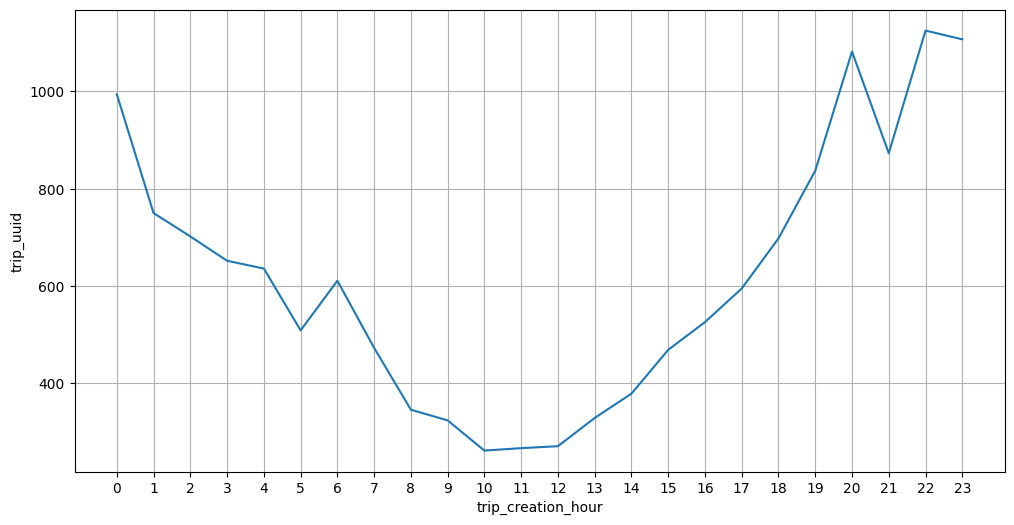

In [ ]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = df_hour,
             x = df_hour['trip_creation_hour'],
             y = df_hour['trip_uuid'],
             markers = '*')
plt.xticks(np.arange(0,24))
plt.grid('both')
plt.plot()

The data suggests that the number of trips begins to rise after noon, peaks at 10 P.M., and then gradually declines.

In [ ]:
df2['trip_creation_day'].unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30,  1,  2,  3], dtype=int8)

In [ ]:
df_day = df2.groupby(by = 'trip_creation_day')['trip_uuid'].count().to_frame().reset_index()
df_day

trip_creation_day  trip_uuid
0                   1        605
1                   2        552
2                   3        631
3                  12        747
4                  13        750
5                  14        712
6                  15        783
7                  16        616
8                  17        722
9                  18        791
10                 19        676
11                 20        704
12                 21        740
13                 22        740
14                 23        631
15                 24        660
16                 25        697
17                 26        685
18                 27        652
19                 28        608
20                 29        607
21                 30        508

[]

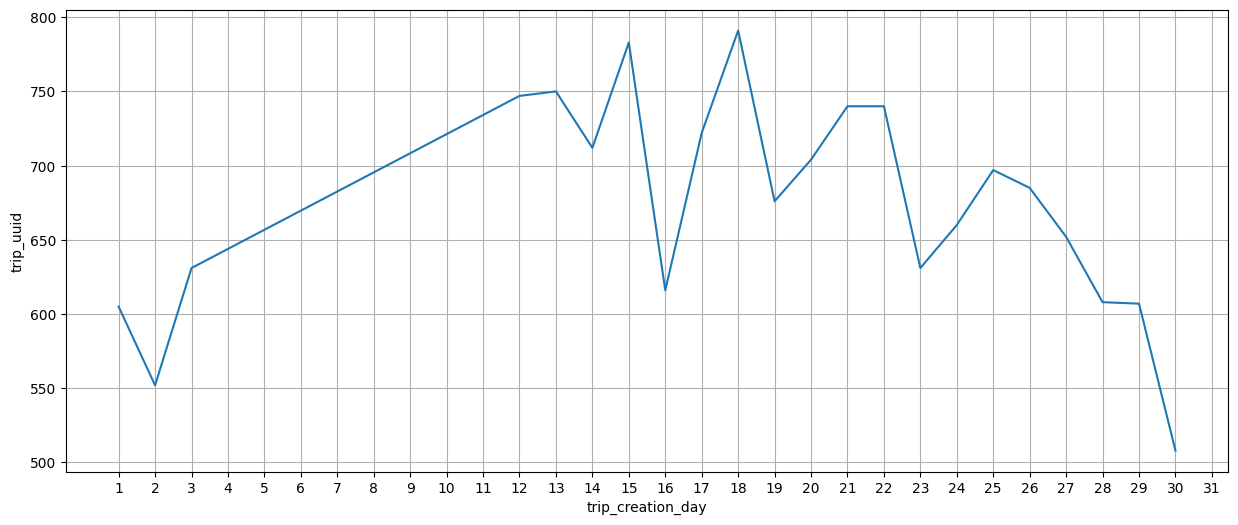

In [ ]:
plt.figure(figsize = (15, 6))
sns.lineplot(data = df_day,
             x = df_day['trip_creation_day'],
             y = df_day['trip_uuid'],
             markers = 'o')
plt.xticks(np.arange(1, 32))
plt.grid('both')
plt.plot()



- The data depicted in the plot suggests that the majority of trips are initiated during the middle portion of the month.
- Consequently, it can be deduced that customers tend to place a higher number of orders during this timeframe.




In [ ]:
df2['trip_creation_week'].unique()

array([37, 38, 39, 40], dtype=int8)

In [ ]:
df_week = df2.groupby(by = 'trip_creation_week')['trip_uuid'].count().to_frame().reset_index()
df_week

trip_creation_week  trip_uuid
0                  37       3608
1                  38       5004
2                  39       4417
3                  40       1788

[]

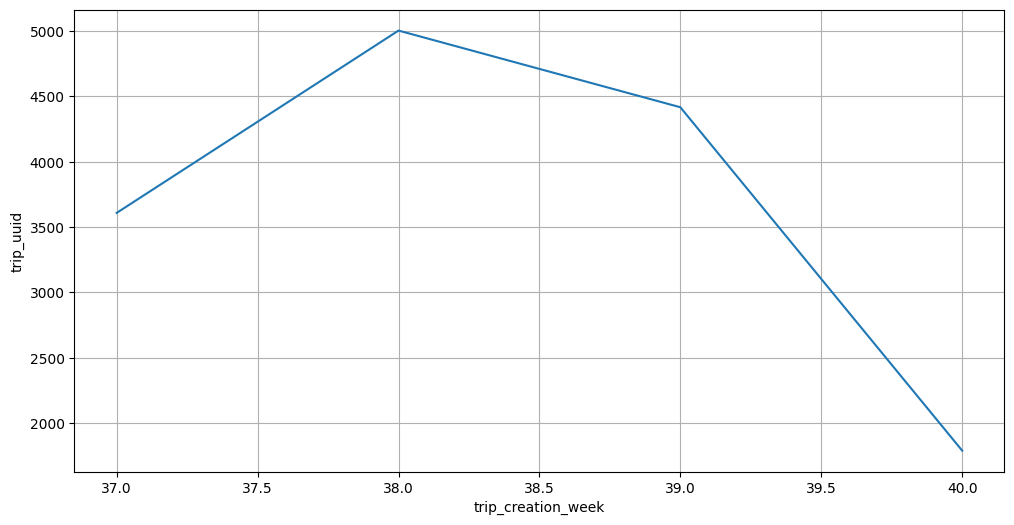

In [ ]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = df_week,
             x = df_week['trip_creation_week'],
             y = df_week['trip_uuid'],
             markers = 'o')
plt.grid('both')
plt.plot()

The data suggests that the majority of trips were initiated during the 38th week.

In [ ]:
df_month = df2.groupby(by = 'trip_creation_month')['trip_uuid'].count().to_frame().reset_index()
df_month['perc'] = np.round(df_month['trip_uuid'] * 100/ df_month['trip_uuid'].sum(), 2)
df_month

trip_creation_month  trip_uuid   perc
0                    9      13029  87.93
1                   10       1788  12.07

[]

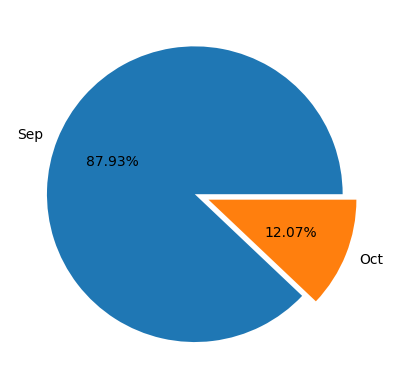

In [ ]:
plt.pie(x = df_month['trip_uuid'],
        labels = ['Sep', 'Oct'],
        explode = [0, 0.1],
       autopct = '%.2f%%')
plt.plot()

In [ ]:
df_data = df2.groupby(by = 'data')['trip_uuid'].count().to_frame().reset_index()
df_data['perc'] = np.round(df_data['trip_uuid'] * 100/ df_data['trip_uuid'].sum(), 2)
df_data

data  trip_uuid  perc
0      test       4163  28.1
1  training      10654  71.9

[]

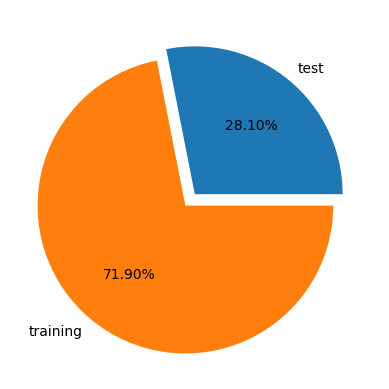

In [ ]:
plt.pie(x = df_data['trip_uuid'],
        labels = df_data['data'],
        explode = [0, 0.1],
        autopct = '%.2f%%')
plt.plot()

In [ ]:
df_route = df2.groupby(by = 'route_type')['trip_uuid'].count().to_frame().reset_index()
df_route['perc'] = np.round(df_route['trip_uuid'] * 100/ df_route['trip_uuid'].sum(), 2)
df_route.head()

route_type  trip_uuid   perc
0    Carting       8908  60.12
1        FTL       5909  39.88

[]

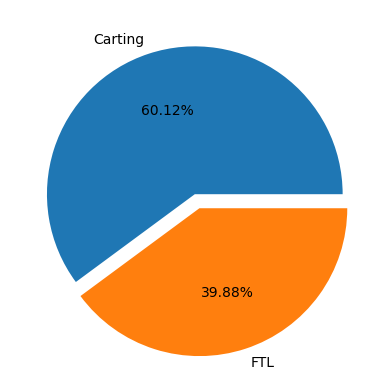

In [ ]:
plt.pie(x = df_route['trip_uuid'],
        labels = ['Carting', 'FTL'],
        explode = [0, 0.1],
        autopct = '%.2f%%')
plt.plot()

In [ ]:
df_source_state = df2.groupby(by = 'source_state')['trip_uuid'].count().to_frame().reset_index()
df_source_state['perc'] = np.round(df_source_state['trip_uuid'] * 100/ df_source_state['trip_uuid'].sum(), 2)
df_source_state = df_source_state.sort_values(by = 'trip_uuid', ascending = False)
df_source_state

source_state  trip_uuid   perc
17             Maharashtra       2714  18.32
14               Karnataka       2143  14.46
10                 Haryana       1838  12.40
24              Tamil Nadu       1039   7.01
25               Telangana        781   5.27
26           Uttar Pradesh        762   5.14
9                  Gujarat        750   5.06
7                    Delhi        728   4.91
28             West Bengal        665   4.49
22                  Punjab        536   3.62
23               Rajasthan        514   3.47
0           Andhra Pradesh        434   2.93
3                    Bihar        350   2.36
16          Madhya Pradesh        317   2.14
15                  Kerala        289   1.95
2                    Assam        268   1.81
13               Jharkhand        160   1.08
27             Uttarakhand        114   0.77
20                  Orissa        107   0.72
4               Chandigarh         93   0.63
8                      Goa         65   0.44
5             Chhattisgarh         43   0.29
11        Himachal Pradesh         34   0.23
12         Jammu & Kashmir         17   0.11
6   Dadra and Nagar Haveli         15   0.10
21             Pondicherry         12   0.08
31              location_3          8   0.05
19                Nagaland          5   0.03
33              location_9          5   0.03
18                 Mizoram          4   0.03
1        Arunachal Pradesh          4   0.03
29             location_14          1   0.01
30              location_2          1   0.01
32              location_7          1   0.01

<ipython-input-71-55ab069bd394>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_source_state,


[]

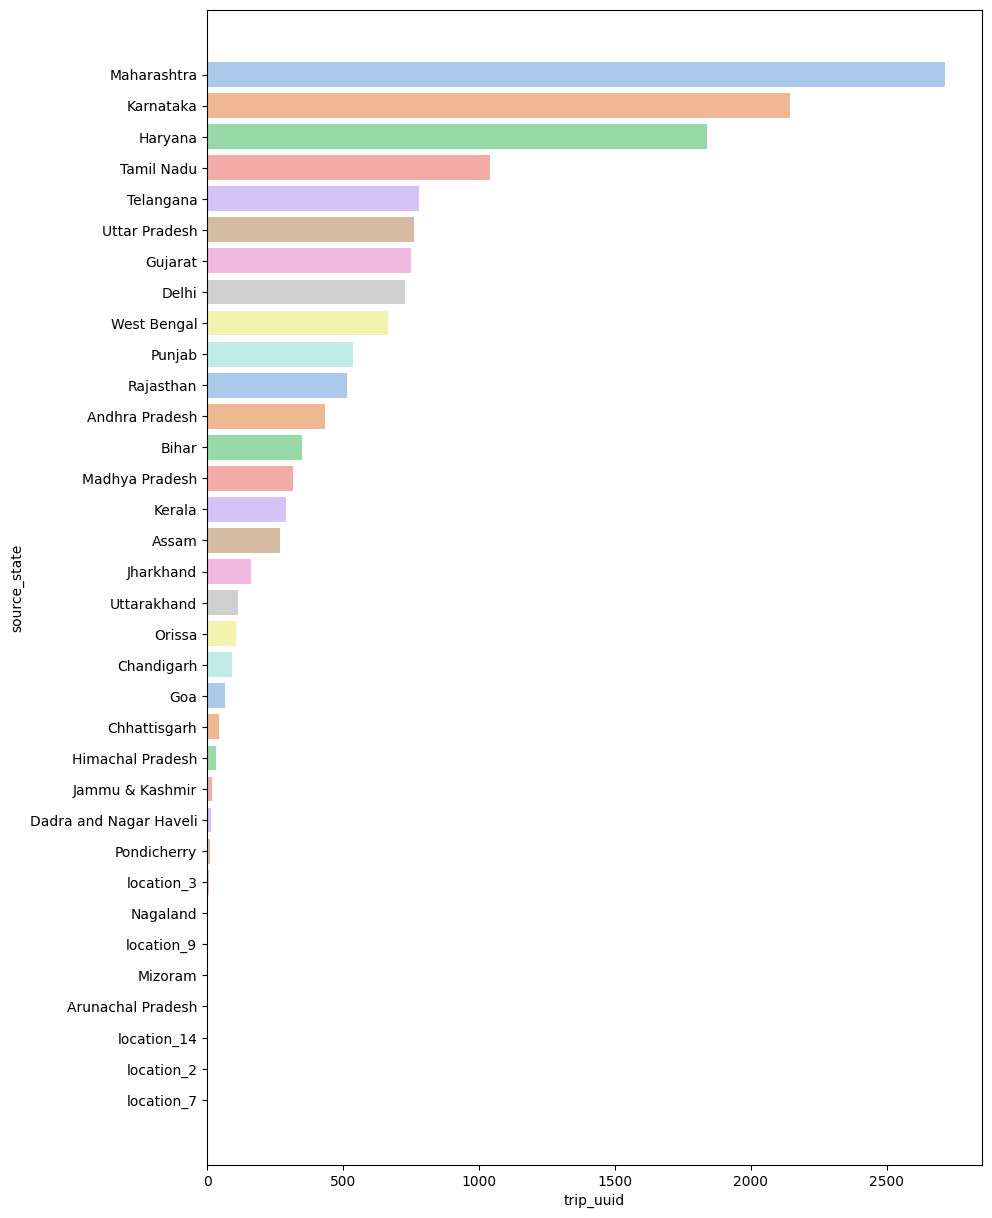

In [ ]:
plt.figure(figsize = (10, 15))
sns.barplot(data = df_source_state,
            x = df_source_state['trip_uuid'],
            y = df_source_state['source_state'],
            palette="pastel")
plt.plot()

The plot above indicates that the highest number of trips originated from Maharashtra, followed by Karnataka and Haryana. This suggests a robust seller presence in these states.

In [ ]:
df_source_city = df2.groupby(by = 'source_city')['trip_uuid'].count().to_frame().reset_index()
df_source_city['perc'] = np.round(df_source_city['trip_uuid'] * 100/ df_source_city['trip_uuid'].sum(), 2)
df_source_city = df_source_city.sort_values(by = 'trip_uuid', ascending = False)[:30]
df_source_city

source_city  trip_uuid  perc
439         Mumbai       1442  9.73
237        Gurgaon       1165  7.86
169          Delhi        883  5.96
79       Bengaluru        726  4.90
100       Bhiwandi        697  4.70
58       Bangalore        648  4.37
136        Chennai        568  3.83
264      Hyderabad        524  3.54
516           Pune        480  3.24
357        Kolkata        356  2.40
610        Sonipat        276  1.86
2        Ahmedabad        274  1.85
133     Chandigarh        273  1.84
270         Jaipur        259  1.75
201      Faridabad        227  1.53
447     Muzaffrpur        159  1.07
382       Ludhiana        158  1.07
320         Kanpur        145  0.98
621          Surat        140  0.94
473          Noida        129  0.87
102         Bhopal        125  0.84
240       Guwahati        118  0.80
154     Coimbatore         69  0.47
679  Visakhapatnam         69  0.47
380     LowerParel         65  0.44
477            PNQ         62  0.42
273      Jalandhar         54  0.36
220            Goa         52  0.35
25       Anantapur         51  0.34
261          Hubli         47  0.32

<ipython-input-73-ae24b7ee8e71>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_source_city,


[]

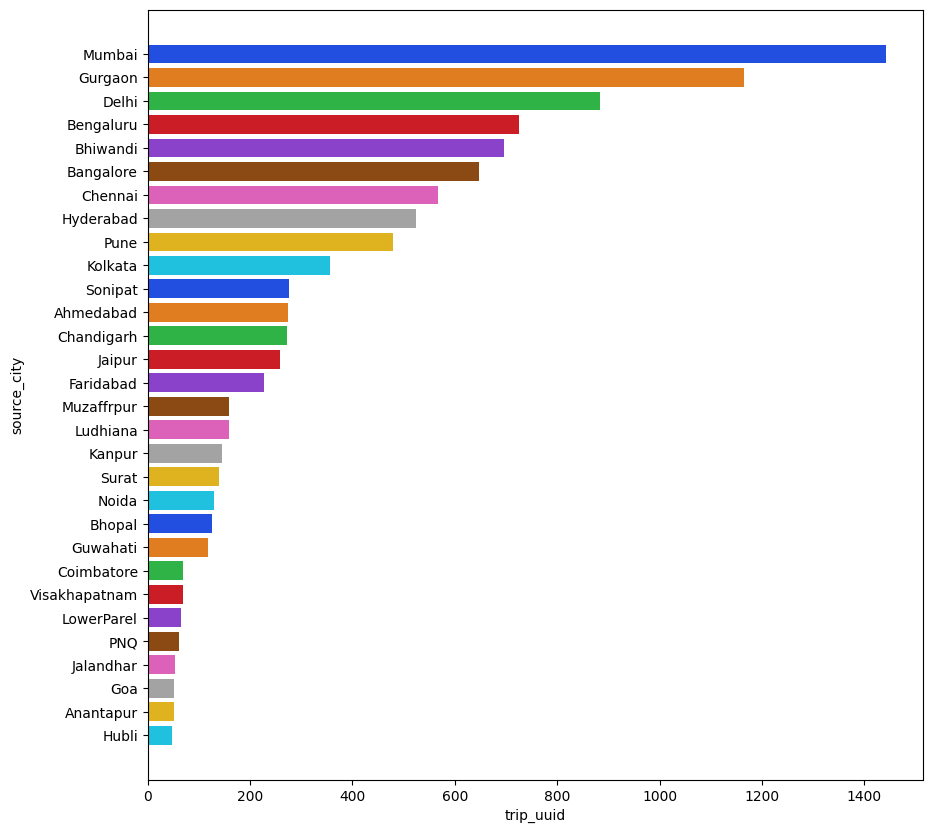

In [ ]:
plt.figure(figsize = (10, 10))
sns.barplot(data = df_source_city,
            x = df_source_city['trip_uuid'],
            y = df_source_city['source_city'],
            palette="bright")
plt.plot()

The plot indicates that the highest number of trips originated from Mumbai, followed by Gurgaon Delhi, Bengaluru, and Bhiwandi. This suggests a robust presence of sellers in these cities.

In [ ]:
df_destination_state = df2.groupby(by = 'destination_state')['trip_uuid'].count().to_frame().reset_index()
df_destination_state['perc'] = np.round(df_destination_state['trip_uuid'] * 100/ df_destination_state['trip_uuid'].sum(), 2)
df_destination_state = df_destination_state.sort_values(by = 'trip_uuid', ascending = False)
df_destination_state

destination_state  trip_uuid   perc
18             Maharashtra       2561  17.28
15               Karnataka       2294  15.48
11                 Haryana       1643  11.09
25              Tamil Nadu       1084   7.32
28           Uttar Pradesh        811   5.47
26               Telangana        784   5.29
10                 Gujarat        734   4.95
30             West Bengal        697   4.70
8                    Delhi        652   4.40
23                  Punjab        617   4.16
24               Rajasthan        543   3.66
0           Andhra Pradesh        442   2.98
3                    Bihar        365   2.46
17          Madhya Pradesh        358   2.42
16                  Kerala        270   1.82
2                    Assam        232   1.57
14               Jharkhand        181   1.22
29             Uttarakhand        122   0.82
22                  Orissa        119   0.80
4               Chandigarh         65   0.44
9                      Goa         52   0.35
5             Chhattisgarh         43   0.29
12        Himachal Pradesh         42   0.28
1        Arunachal Pradesh         25   0.17
13         Jammu & Kashmir         20   0.13
35              location_3         17   0.11
6   Dadra and Nagar Haveli         17   0.11
19               Meghalaya          8   0.05
20                 Mizoram          6   0.04
31             location_11          3   0.02
33             location_13          2   0.01
27                 Tripura          1   0.01
21                Nagaland          1   0.01
32             location_12          1   0.01
34              location_2          1   0.01
7              Daman & Diu          1   0.01
36              location_5          1   0.01
37              location_6          1   0.01
38              location_7          1   0.01

<ipython-input-75-761796f89f53>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_destination_state,


[]

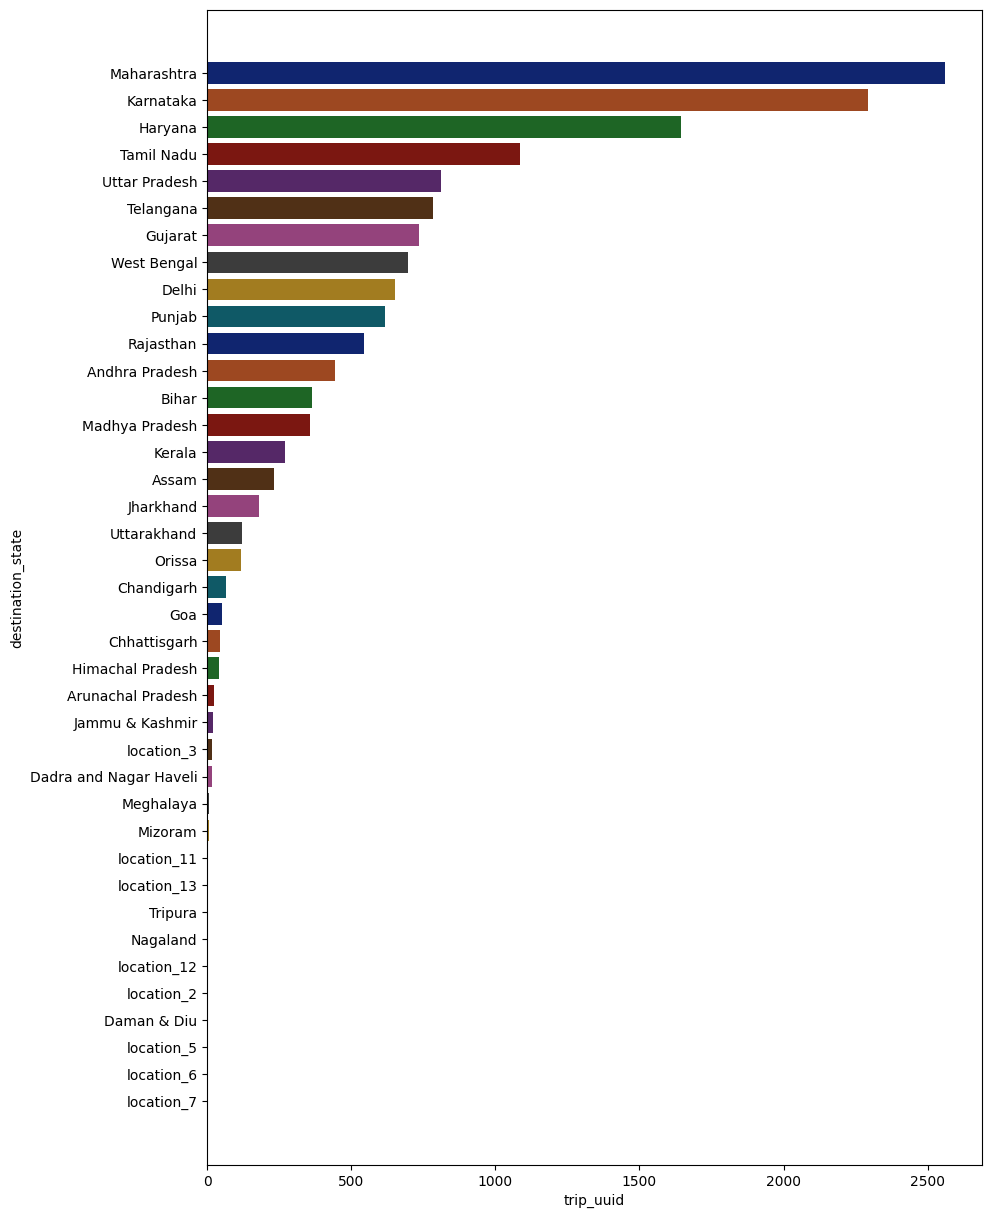

In [ ]:
plt.figure(figsize = (10, 15))
sns.barplot(data = df_destination_state,
            x = df_destination_state['trip_uuid'],
            y = df_destination_state['destination_state'],
            palette = "dark")
plt.plot()

The graphical representation demonstrates that Maharashtra accounted for the highest number of concluded trips, followed by Karnataka, Haryana, Tamil Nadu, and Uttar Pradesh, underscoring a notable demand for orders within these regions.

In [ ]:
df_destination_city = df2.groupby(by = 'destination_city')['trip_uuid'].count().to_frame().reset_index()
df_destination_city['perc'] = np.round(df_destination_city['trip_uuid'] * 100/ df_destination_city['trip_uuid'].sum(), 2)
df_destination_city = df_destination_city.sort_values(by = 'trip_uuid', ascending = False)[:30]
df_destination_city

destination_city  trip_uuid   perc
515           Mumbai       1548  10.45
96         Bengaluru        975   6.58
282          Gurgaon        936   6.32
200            Delhi        778   5.25
163          Chennai        595   4.02
72         Bangalore        551   3.72
308        Hyderabad        503   3.39
115         Bhiwandi        434   2.93
418          Kolkata        384   2.59
158       Chandigarh        339   2.29
724          Sonipat        322   2.17
612             Pune        317   2.14
4          Ahmedabad        265   1.79
242        Faridabad        244   1.65
318           Jaipur        205   1.38
371           Kanpur        148   1.00
117           Bhopal        139   0.94
559              PNQ        122   0.82
739            Surat        117   0.79
552            Noida        106   0.72
521       Muzaffrpur        102   0.69
284         Guwahati         98   0.66
448         Ludhiana         70   0.47
797    Visakhapatnam         64   0.43
259        Ghaziabad         56   0.38
208          Dhanbad         50   0.34
639           Ranchi         49   0.33
110         Bhatinda         48   0.32
183       Coimbatore         47   0.32
9              Akola         45   0.30

<ipython-input-77-c4fe384faf87>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_destination_city,


[]

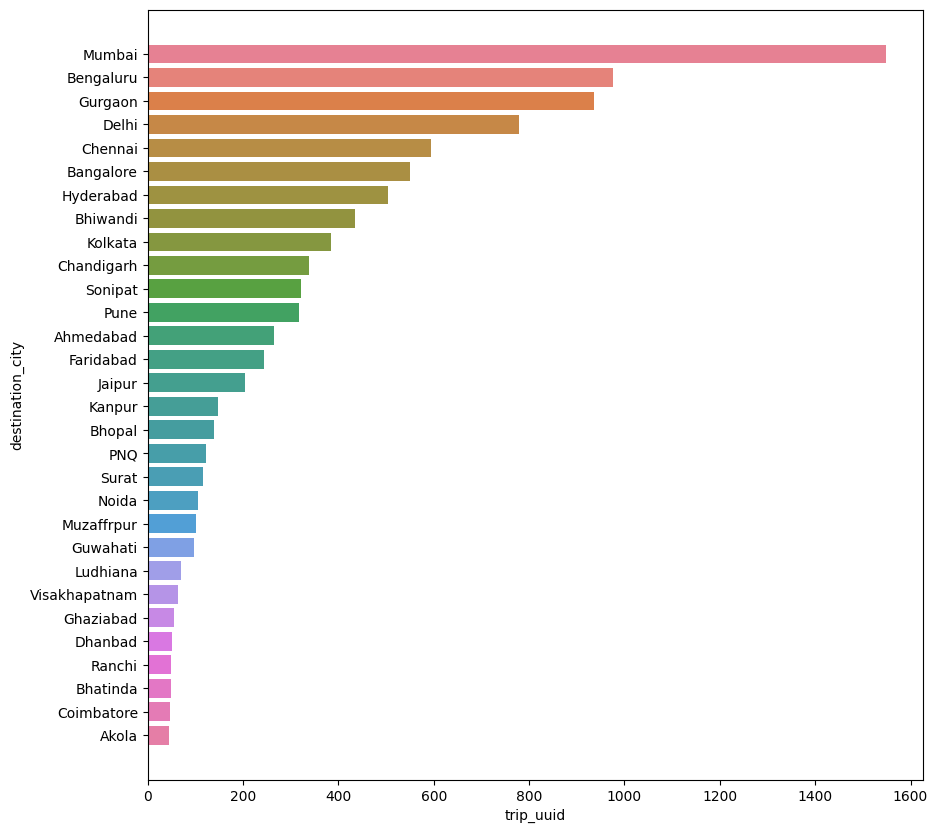

In [ ]:
plt.figure(figsize = (10, 10))
sns.barplot(data = df_destination_city,
            x = df_destination_city['trip_uuid'],
            y = df_destination_city['destination_city'],
            palette = 'husl')
plt.plot()

According to the plot, the greatest number of trips concluded in Mumbai, with Bengaluru, Gurgaon, Delhi, and Chennai following suit. This indicates a considerable influx of orders in these particular cities.

[]

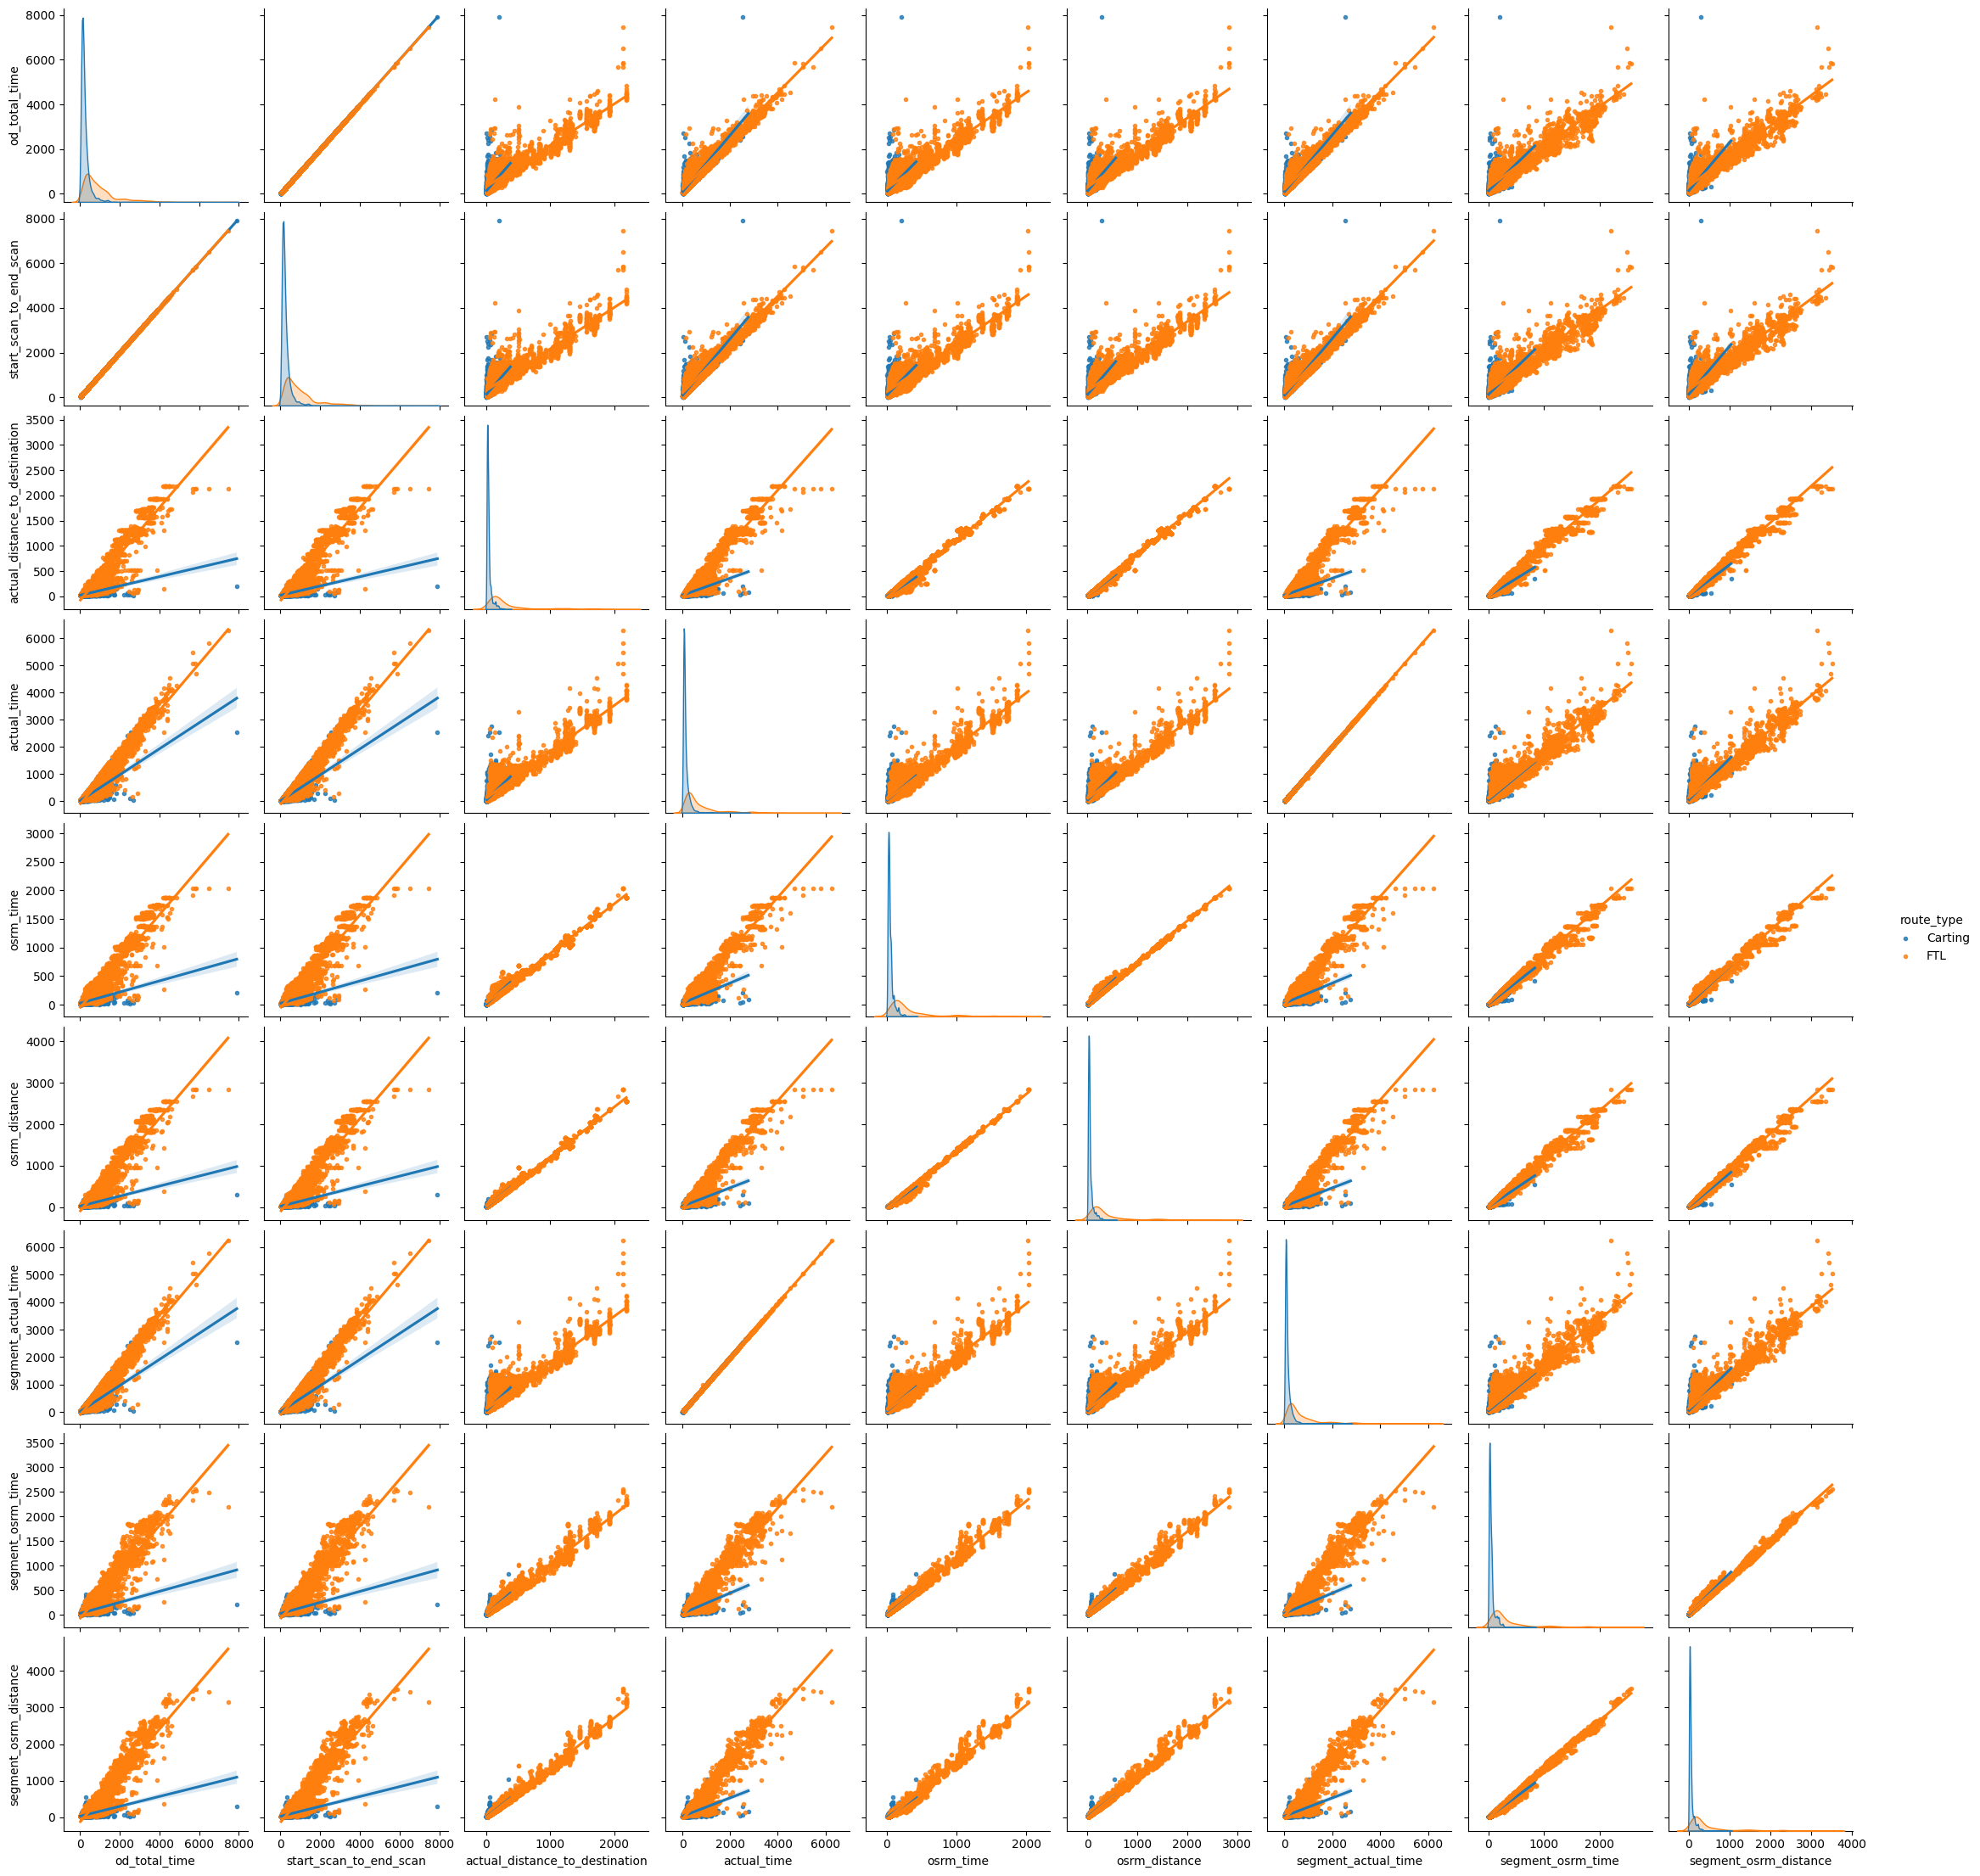

In [ ]:
numerical_columns = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']
sns.pairplot(data = df2,
             vars = numerical_columns,
             kind = 'reg',
             hue = 'route_type',
             markers = '.')
plt.plot()

In [ ]:
df_corr = df2[numerical_columns].corr()
df_corr

od_total_time  start_scan_to_end_scan  \
od_total_time                        1.000000                0.999999   
start_scan_to_end_scan               0.999999                1.000000   
actual_distance_to_destination       0.918222                0.918308   
actual_time                          0.961094                0.961147   
osrm_time                            0.926516                0.926571   
osrm_distance                        0.924219                0.924299   
segment_actual_time                  0.961119                0.961171   
segment_osrm_time                    0.918490                0.918561   
segment_osrm_distance                0.919199                0.919291   

                                actual_distance_to_destination  actual_time  \
od_total_time                                         0.918222     0.961094   
start_scan_to_end_scan                                0.918308     0.961147   
actual_distance_to_destination                        1.000000     0.953757   
actual_time                                           0.953757     1.000000   
osrm_time                                             0.993561     0.958593   
osrm_distance                                         0.997264     0.959214   
segment_actual_time                                   0.952821     0.999989   
segment_osrm_time                                     0.987538     0.953872   
segment_osrm_distance                                 0.993061     0.956967   

                                osrm_time  osrm_distance  segment_actual_time  \
od_total_time                    0.926516       0.924219             0.961119   
start_scan_to_end_scan           0.926571       0.924299             0.961171   
actual_distance_to_destination   0.993561       0.997264             0.952821   
actual_time                      0.958593       0.959214             0.999989   
osrm_time                        1.000000       0.997580             0.957765   
osrm_distance                    0.997580       1.000000             0.958353   
segment_actual_time              0.957765       0.958353             1.000000   
segment_osrm_time                0.993259       0.991798             0.953039   
segment_osrm_distance            0.991608       0.994710             0.956106   

                                segment_osrm_time  segment_osrm_distance  
od_total_time                            0.918490               0.919199  
start_scan_to_end_scan                   0.918561               0.919291  
actual_distance_to_destination           0.987538               0.993061  
actual_time                              0.953872               0.956967  
osrm_time                                0.993259               0.991608  
osrm_distance                            0.991798               0.994710  
segment_actual_time                      0.953039               0.956106  
segment_osrm_time                        1.000000               0.996092  
segment_osrm_distance                    0.996092               1.000000

[]

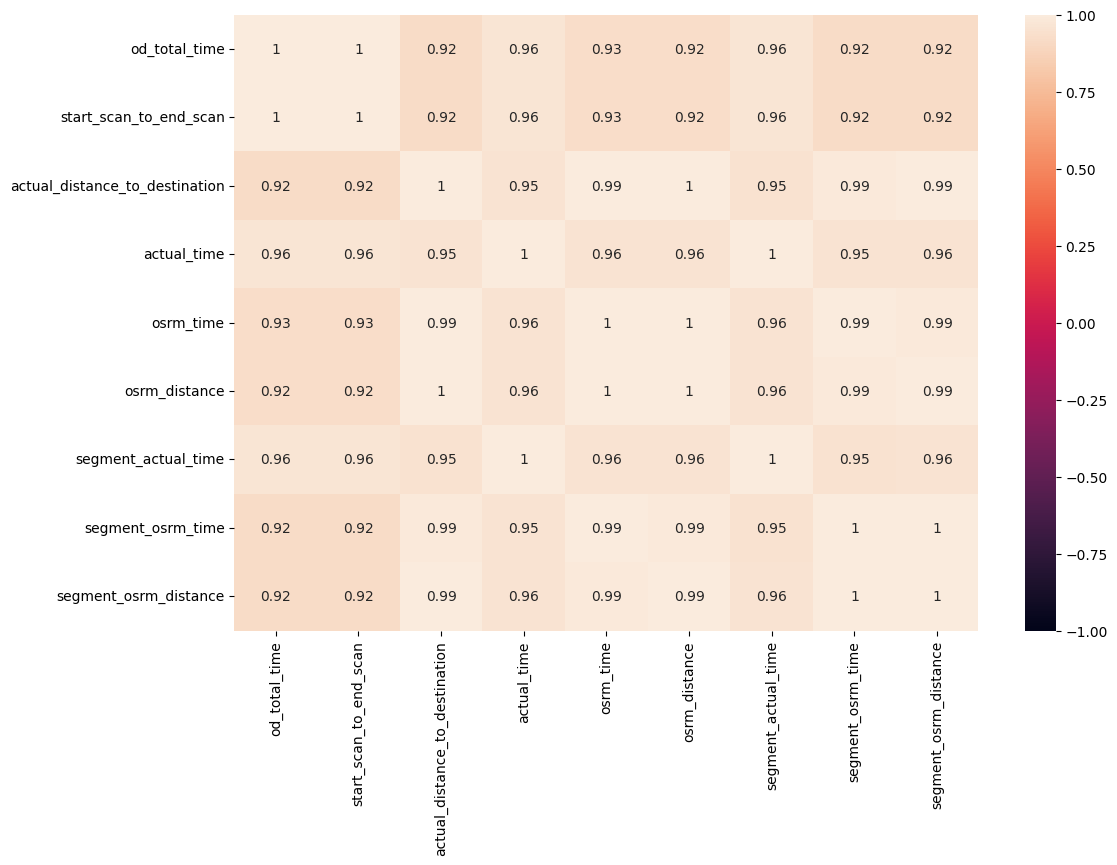

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(data = df_corr, vmin = -1, vmax = 1, annot = True)
plt.plot()

There is a strong correlation, with a coefficient exceeding 0.9, among all the
specified numerical columns.

**In-depth analysis and feature engineering:**

Compare the difference between od_total_time and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.

**STEP-1** : Set up Null Hypothesis

Null Hypothesis ( H0 ) - od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are same.

Alternate Hypothesis ( HA ) - od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are different.

**STEP-2** : Checking for basic assumpitons for the hypothesis

Distribution check using QQ Plot
Homogeneity of Variances using Lavene's test

**STEP-3**: Define Test statistics; Distribution of T under H0.

If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.

**STEP-4**: Compute the p-value and fix value of alpha.

We set our alpha to be 0.05

**STEP-5**: Compare p-value and alpha.

Based on p-value, we will accept or reject H0.

p-val > alpha : Accept H0
p-val < alpha : Reject H0

In [ ]:
df2[['od_total_time', 'start_scan_to_end_scan']].describe()

od_total_time  start_scan_to_end_scan
count   14817.000000            14817.000000
mean      531.697630              530.810016
std       658.868223              658.705957
min        23.460000               23.000000
25%       149.930000              149.000000
50%       280.770000              280.000000
75%       638.200000              637.000000
max      7898.550000             7898.000000

- Visual Tests to know if the samples follow normal distribution

[]

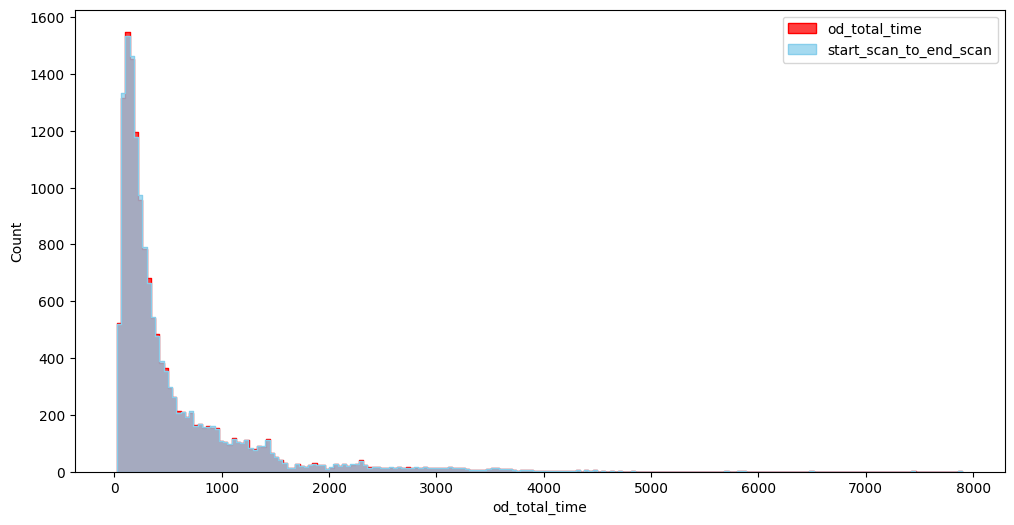

In [ ]:
plt.figure(figsize = (12, 6))
sns.histplot(df2['od_total_time'], element = 'step', color = 'red')
sns.histplot(df2['start_scan_to_end_scan'], element = 'step', color = 'skyblue')
plt.legend(['od_total_time', 'start_scan_to_end_scan'])
plt.plot()

- Distribution check using QQ Plot

[]

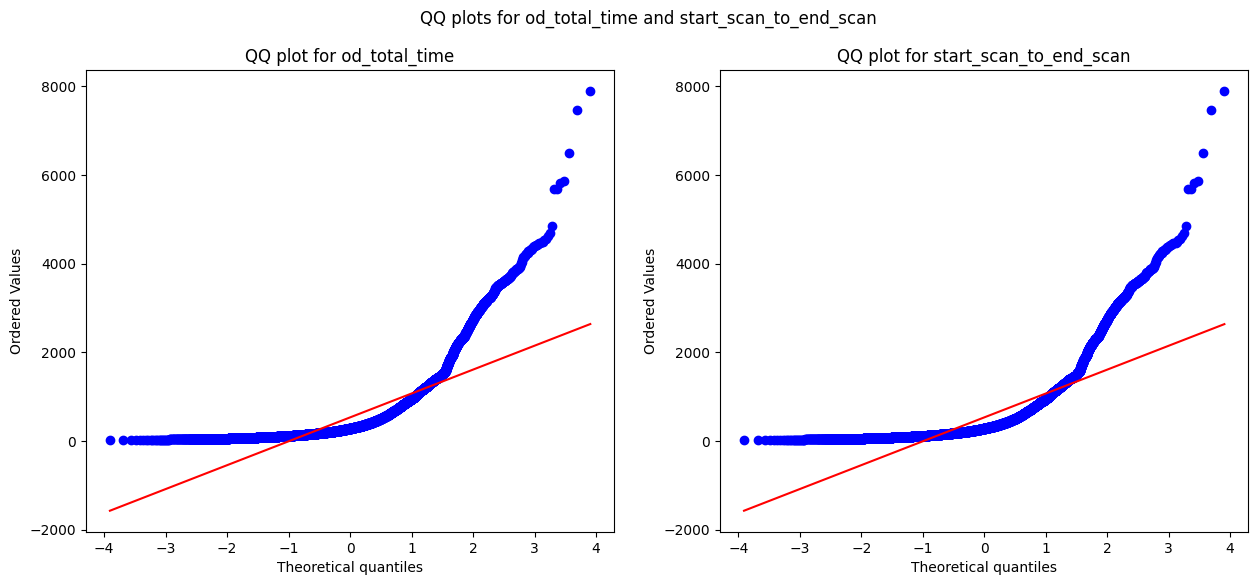

In [ ]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for od_total_time and start_scan_to_end_scan')
spy.probplot(df2['od_total_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for od_total_time')
plt.subplot(1, 2, 2)
spy.probplot(df2['start_scan_to_end_scan'], plot = plt, dist = 'norm')
plt.title('QQ plot for start_scan_to_end_scan')
plt.plot()

It can be seen from the above plots that the samples do not come from normal distribution.

- Applying Shapiro-Wilk test for normality

H0 : The sample follows normal distribution

H1 : The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [ ]:
test_stat, p_value = spy.shapiro(df2['od_total_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.

In [ ]:
transformed_od_total_time = spy.boxcox(df2['od_total_time'])[0]
test_stat, p_value = spy.shapiro(transformed_od_total_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 7.172770042757021e-25
The sample does not follow normal distribution


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
transformed_start_scan_to_end_scan = spy.boxcox(df2['start_scan_to_end_scan'])[0]
test_stat, p_value = spy.shapiro(transformed_start_scan_to_end_scan)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.0471322892609475e-24
The sample does not follow normal distribution


Even after applying the boxcox transformation on each of the "od_total_time" and "start_scan_to_end_scan" columns, the distributions do not follow normal distribution.

- Homogeneity of Variances using Lavene's test

In [ ]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df2['od_total_time'], df2['start_scan_to_end_scan'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.9668007217581142
The samples have Homogenous Variance 


Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [ ]:
test_stat, p_value = spy.mannwhitneyu(df2['od_total_time'], df2['start_scan_to_end_scan'])
print('P-value :',p_value)

P-value : 0.7815123224221716


Since p-value > alpha therfore it can be concluded that od_total_time and start_scan_to_end_scan are similar.

**Hypothesis testing / visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

In [ ]:
df2[['actual_time', 'osrm_time']].describe()

actual_time     osrm_time
count  14817.000000  14817.000000
mean     357.143768    161.384018
std      561.396118    271.360992
min        9.000000      6.000000
25%       67.000000     29.000000
50%      149.000000     60.000000
75%      370.000000    168.000000
max     6265.000000   2032.000000

- Visual Tests to know if the samples follow normal distribution

[]

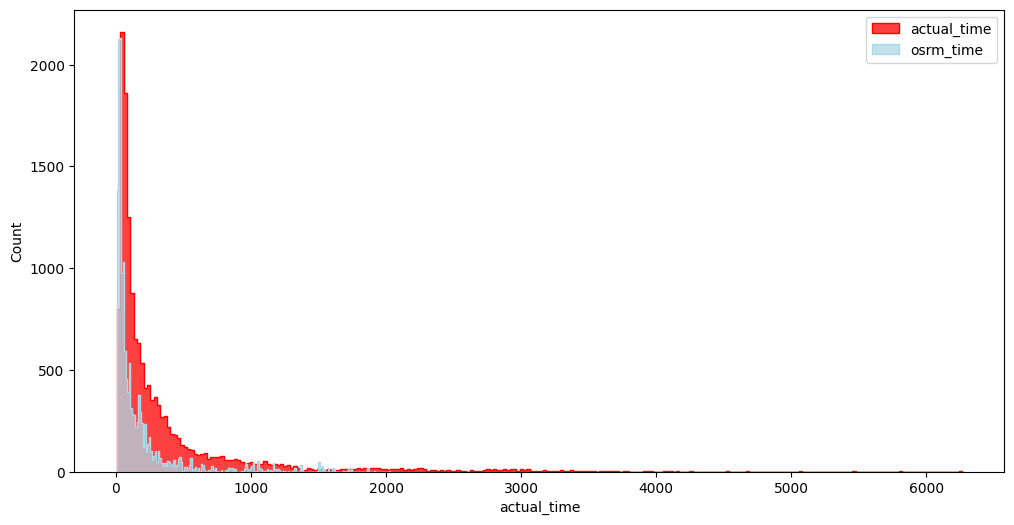

In [ ]:
plt.figure(figsize = (12, 6))
sns.histplot(df2['actual_time'], element = 'step', color = 'red')
sns.histplot(df2['osrm_time'], element = 'step', color = 'lightblue')
plt.legend(['actual_time', 'osrm_time'])
plt.plot()

- Distribution check using QQ Plot

[]

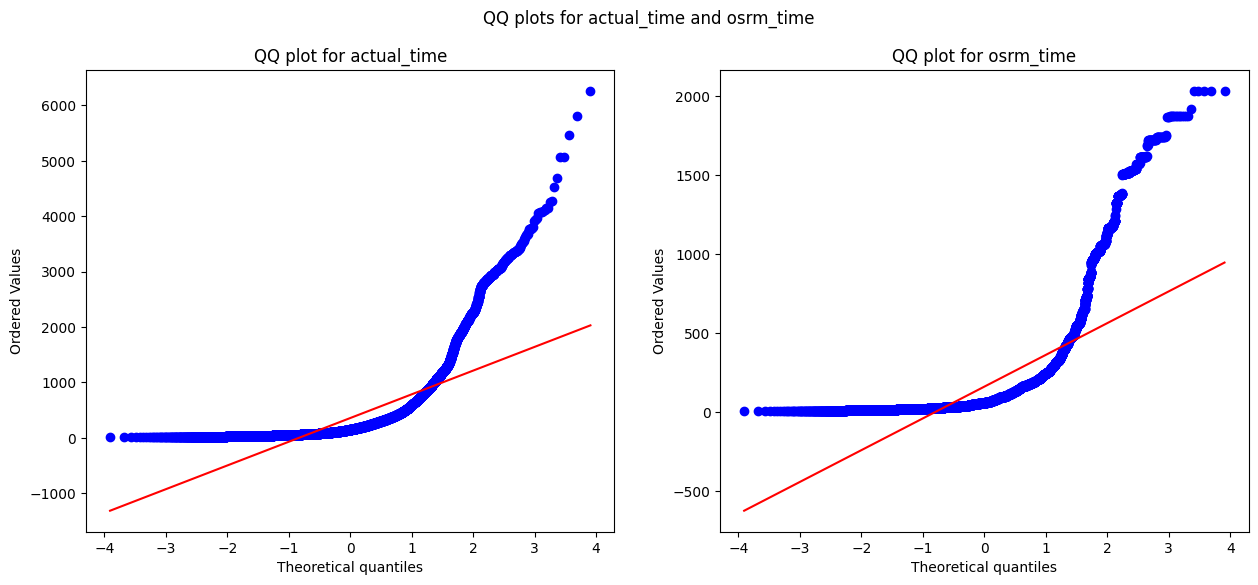

In [ ]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and osrm_time')
spy.probplot(df2['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
spy.probplot(df2['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.plot()

It can be seen from the above plots that the samples do not come from normal distribution.

- **Applying Shapiro-Wilk test for normality**

H0: The sample follows normal distribution

H1: The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [ ]:
test_stat, p_value = spy.shapiro(df2['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df2['osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.

In [ ]:
transformed_actual_time = spy.boxcox(df2['actual_time'])[0]
test_stat, p_value = spy.shapiro(transformed_actual_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.020620453603145e-28
The sample does not follow normal distribution


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
transformed_osrm_time = spy.boxcox(df2['osrm_time'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.5882550510138333e-35
The sample does not follow normal distribution


Even after applying the boxcox transformation on each of the "actual_time" and "osrm_time" columns, the distributions do not follow normal distribution.

- Homogeneity of Variances using Lavene's test

In [ ]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df2['actual_time'], df2['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 1.871098057987424e-220
The samples do not have  Homogenous Variance


Since the samples do not follow any of the assumptions T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [ ]:
test_stat, p_value = spy.mannwhitneyu(df2['actual_time'], df2['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 0.0
The samples are not similar


Since p-value < alpha therfore it can be concluded that actual_time and osrm_time are not similar.

**Hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

In [ ]:
df2[['actual_time', 'segment_actual_time']].describe()

actual_time  segment_actual_time
count  14817.000000         14817.000000
mean     357.143768           353.892273
std      561.396118           556.247925
min        9.000000             9.000000
25%       67.000000            66.000000
50%      149.000000           147.000000
75%      370.000000           367.000000
max     6265.000000          6230.000000

- Visual Tests to know if the samples follow normal distribution

[]

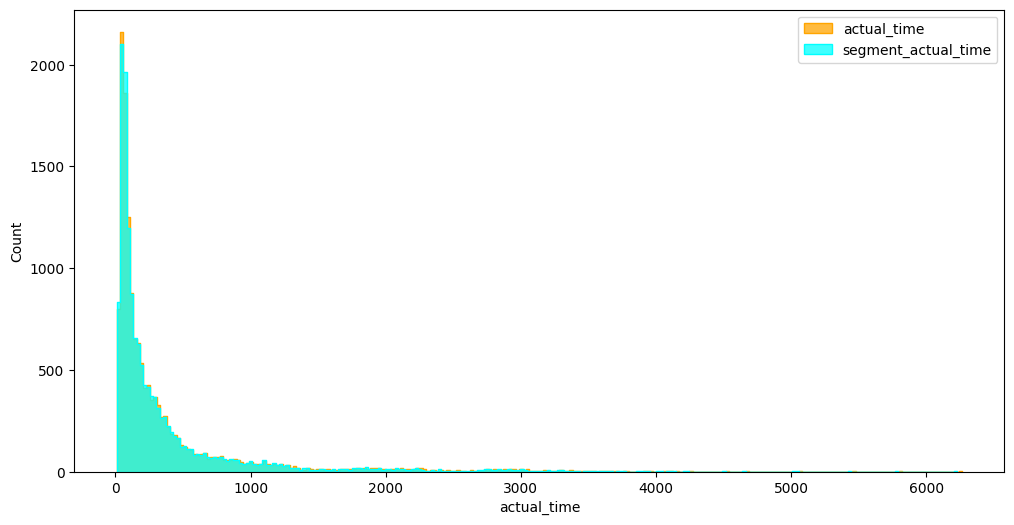

In [ ]:
plt.figure(figsize = (12, 6))
sns.histplot(df2['actual_time'], element = 'step', color = 'orange')
sns.histplot(df2['segment_actual_time'], element = 'step', color = 'cyan')
plt.legend(['actual_time', 'segment_actual_time'])
plt.plot()

- Distribution check using QQ Plot

[]

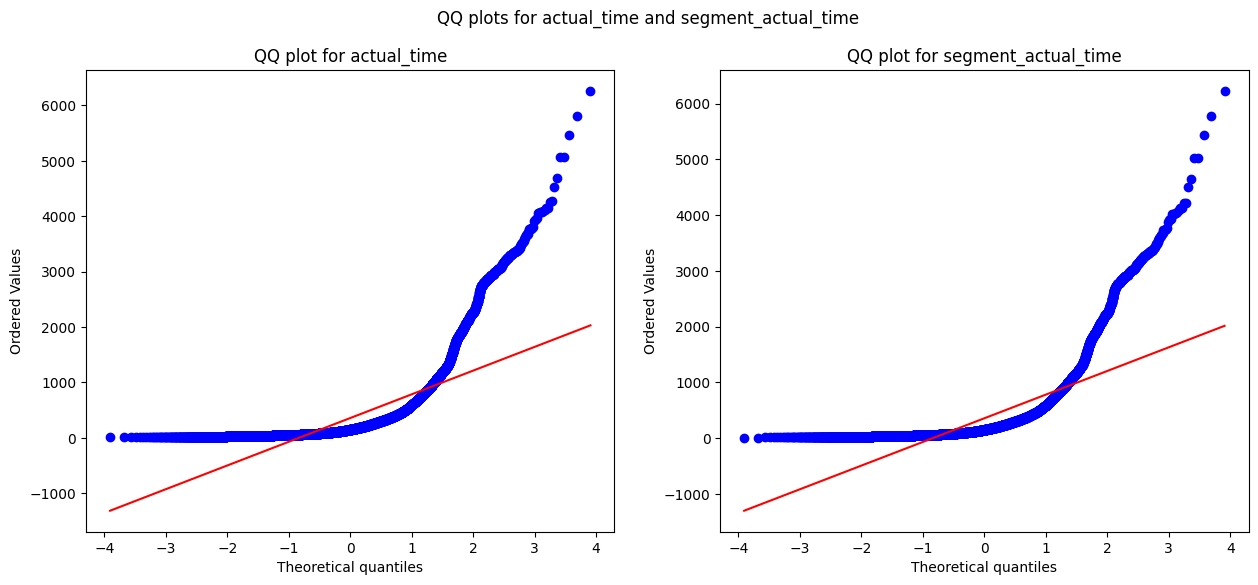

In [ ]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and segment_actual_time')
spy.probplot(df2['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
spy.probplot(df2['segment_actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_actual_time')
plt.plot()

It can be seen from the above plots that the samples do not come from normal distribution.

- **Applying Shapiro-Wilk test for normality**

H0: The sample follows normal distribution

H1: The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [ ]:
test_stat, p_value = spy.shapiro(df2['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df2['segment_actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.

In [ ]:
transformed_actual_time = spy.boxcox(df2['actual_time'])[0]
test_stat, p_value = spy.shapiro(transformed_actual_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.020620453603145e-28
The sample does not follow normal distribution


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
transformed_segment_actual_time = spy.boxcox(df2['segment_actual_time'])[0]
test_stat, p_value = spy.shapiro(transformed_segment_actual_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 5.700074948787037e-29
The sample does not follow normal distribution


Even after applying the boxcox transformation on each of the "actual_time" and "segment_actual_time" columns, the distributions do not follow normal distribution.

- Homogeneity of Variances using Lavene's test

In [ ]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df2['actual_time'], df2['segment_actual_time'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.695502241317651
The samples have Homogenous Variance 


Since the samples do not come from normal distribution T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [ ]:
test_stat, p_value = spy.mannwhitneyu(df2['actual_time'], df2['segment_actual_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 0.4164235159622476
The samples are similar 


Since p-value > alpha therfore it can be concluded that actual_time and segment_actual_time are similar.

**Hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

In [ ]:
df2[['osrm_distance', 'segment_osrm_distance']].describe()

osrm_distance  segment_osrm_distance
count   14817.000000           14817.000000
mean      204.344711             223.201157
std       370.395569             416.628387
min         9.072900               9.072900
25%        30.819201              32.654499
50%        65.618805              70.154404
75%       208.475006             218.802399
max      2840.081055            3523.632324

- Visual Tests to know if the samples follow normal distribution

[]

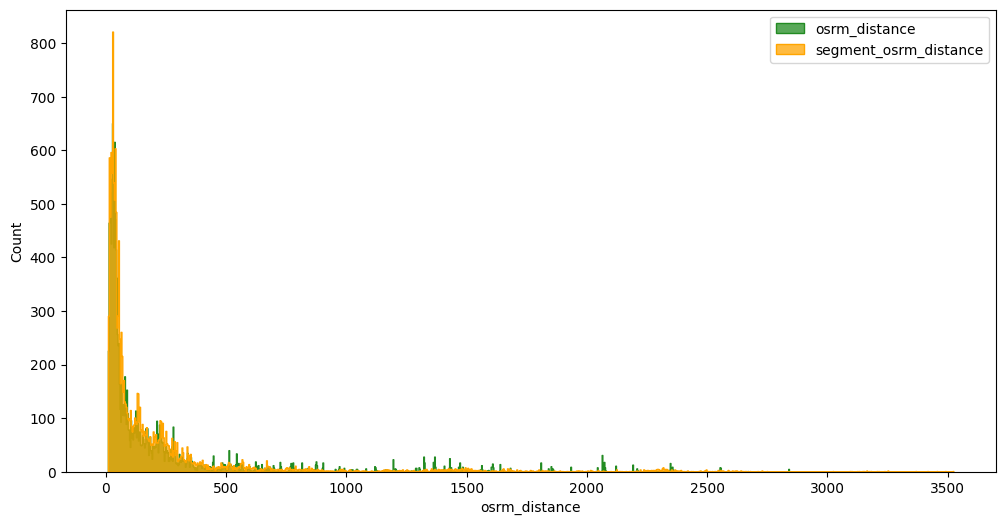

In [ ]:
plt.figure(figsize = (12, 6))
sns.histplot(df2['osrm_distance'], element = 'step', color = 'forestgreen', bins = 1000)
sns.histplot(df2['segment_osrm_distance'], element = 'step', color = 'orange', bins = 1000)
plt.legend(['osrm_distance', 'segment_osrm_distance'])
plt.plot()

- Distribution check using QQ Plot

[]

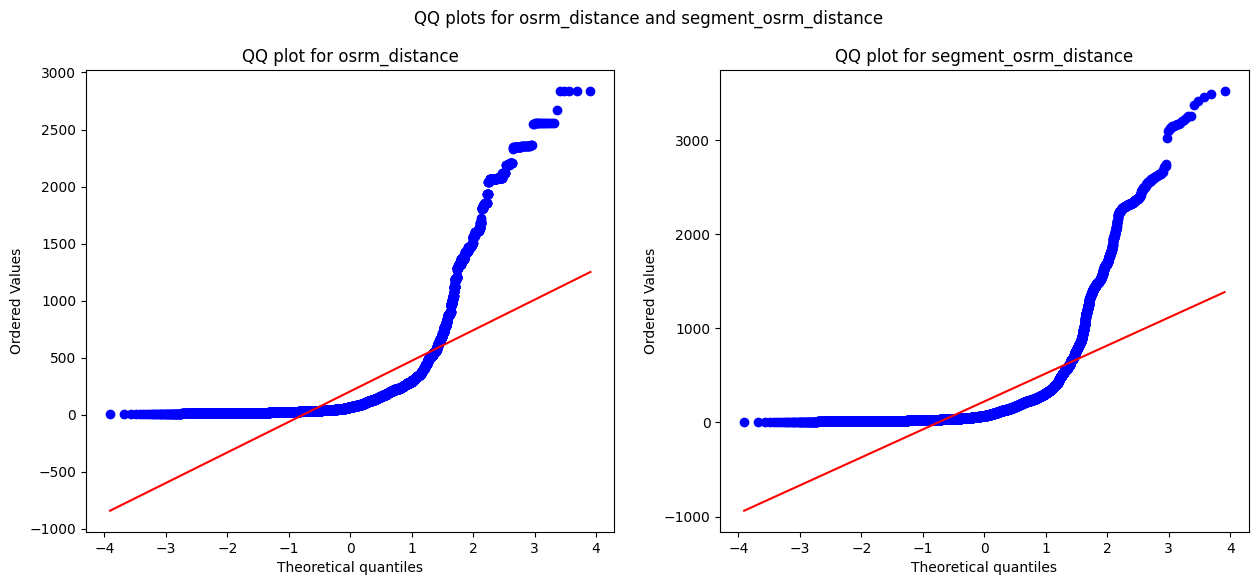

In [ ]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_distance and segment_osrm_distance')
spy.probplot(df2['osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_distance')
plt.subplot(1, 2, 2)
spy.probplot(df2['segment_osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_distance')
plt.plot()

It can be seen from the above plots that the samples do not come from normal distribution.

- **Applying Shapiro-Wilk test for normality**

H0: The sample follows normal distribution

H1: The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [ ]:
test_stat, p_value = spy.shapiro(df2['osrm_distance'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df2['segment_osrm_distance'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.

In [ ]:
transformed_osrm_distance = spy.boxcox(df2['osrm_distance'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_distance)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 7.063104779582808e-41
The sample does not follow normal distribution


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
transformed_segment_osrm_distance = spy.boxcox(df2['segment_osrm_distance'])[0]
test_stat, p_value = spy.shapiro(transformed_segment_osrm_distance)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.049169406432229e-38
The sample does not follow normal distribution


Even after applying the boxcox transformation on each of the "osrm_distance" and "segment_osrm_distance" columns, the distributions do not follow normal distribution.

- Homogeneity of Variances using Lavene's test


In [ ]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df2['osrm_distance'], df2['segment_osrm_distance'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.00020976006524780905
The samples do not have Homogenous Variance


Since the samples do not follow any of the assumptions, T-Test cannot be applied here. We can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [ ]:
test_stat, p_value = spy.mannwhitneyu(df2['osrm_distance'], df2['segment_osrm_distance'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 9.509410818847664e-07
The samples are not similar


Since p-value < alpha therfore it can be concluded that osrm_distance and segment_osrm_distance are not similar.

**Hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

In [ ]:
df2[['osrm_time', 'segment_osrm_time']].describe().T

count        mean         std  min   25%   50%    75%  \
osrm_time          14817.0  161.384018  271.360992  6.0  29.0  60.0  168.0   
segment_osrm_time  14817.0  180.949783  314.542053  6.0  31.0  65.0  185.0   

                      max  
osrm_time          2032.0  
segment_osrm_time  2564.0

Visual Tests to know if the samples follow normal distribution

[]

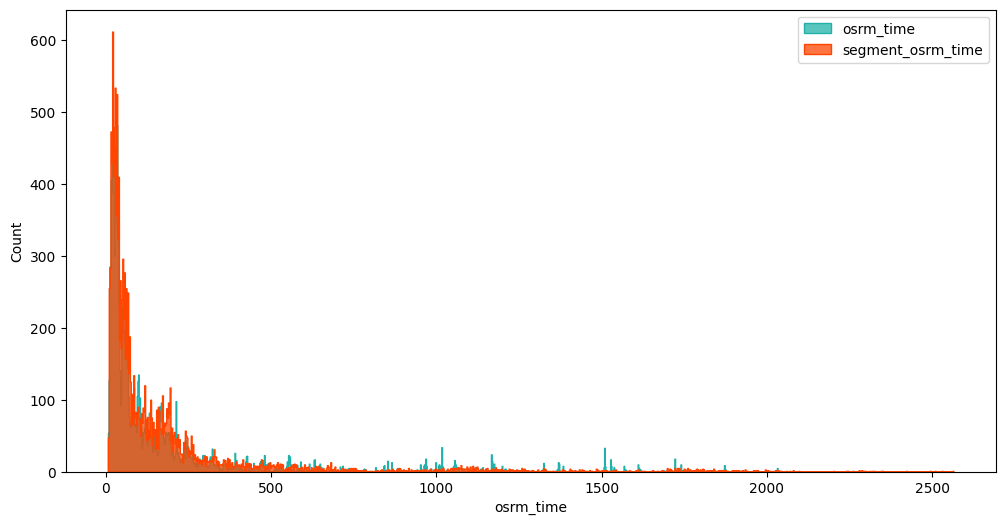

In [ ]:
plt.figure(figsize = (12, 6))
sns.histplot(df2['osrm_time'], element = 'step', color = 'lightseagreen', bins = 1000)
sns.histplot(df2['segment_osrm_time'], element = 'step', color = 'orangered', bins = 1000)
plt.legend(['osrm_time', 'segment_osrm_time'])
plt.plot()

- Distribution check using QQ Plot

[]

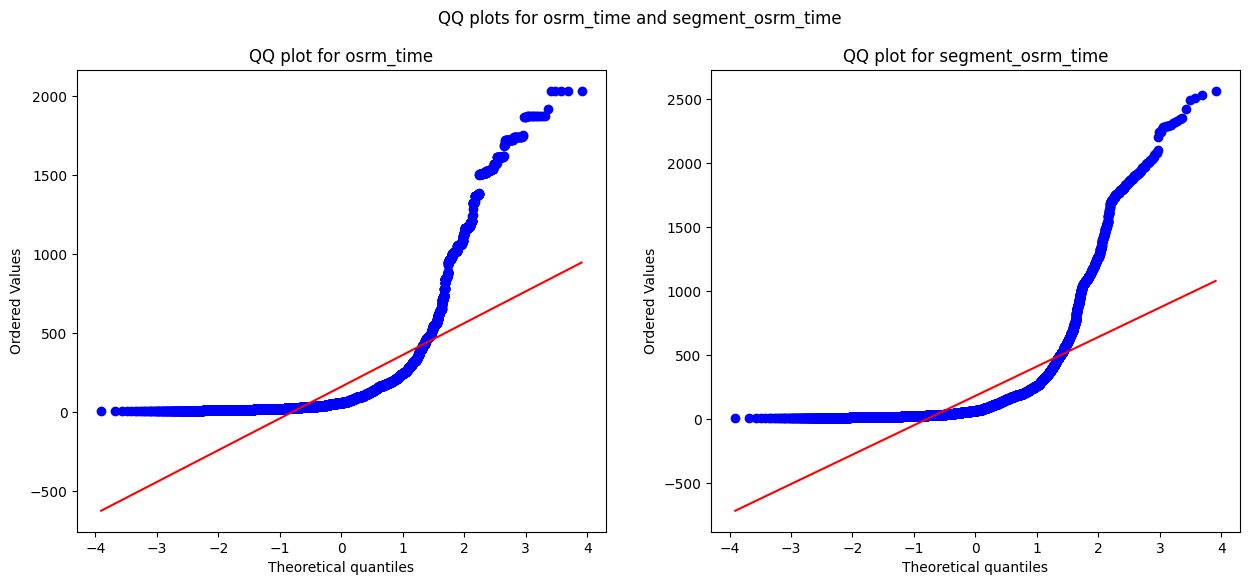

In [ ]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_time and segment_osrm_time')
spy.probplot(df2['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.subplot(1, 2, 2)
spy.probplot(df2['segment_osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_time')
plt.plot()

It can be seen from the above plots that the samples do not come from normal distribution.

- **Applying Shapiro-Wilk test for normality**

H0: The sample follows normal distribution

H1: The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [ ]:
test_stat, p_value = spy.shapiro(df2['osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df2['segment_osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.

In [ ]:
transformed_osrm_time = spy.boxcox(df2['osrm_time'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.5882550510138333e-35
The sample does not follow normal distribution


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
transformed_segment_osrm_time = spy.boxcox(df2['segment_osrm_time'])[0]
test_stat, p_value = spy.shapiro(transformed_segment_osrm_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 4.943039152219146e-34
The sample does not follow normal distribution


Even after applying the boxcox transformation on each of the "osrm_time" and "segment_osrm_time" columns, the distributions do not follow normal distribution.

- Homogeneity of Variances using Lavene's test

In [ ]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df2['osrm_time'], df2['segment_osrm_time'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 8.349506135727595e-08
The samples do not have Homogenous Variance


Since the samples do not follow any of the assumptions, T-Test cannot be applied here. We can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [ ]:
test_stat, p_value = spy.mannwhitneyu(df2['osrm_time'], df2['segment_osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 2.2995370859748865e-08
The samples are not similar


Since p-value < alpha therfore it can be concluded that osrm_time and segment_osrm_time are not similar.

**Find outliers in the numerical variables and check it using visual analysis**

In [ ]:
numerical_columns = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']
df2[numerical_columns].describe().T

count        mean         std        min  \
od_total_time                   14817.0  531.697630  658.868223  23.460000   
start_scan_to_end_scan          14817.0  530.810016  658.705957  23.000000   
actual_distance_to_destination  14817.0  164.477829  305.388153   9.002461   
actual_time                     14817.0  357.143768  561.396118   9.000000   
osrm_time                       14817.0  161.384018  271.360992   6.000000   
osrm_distance                   14817.0  204.344711  370.395569   9.072900   
segment_actual_time             14817.0  353.892273  556.247925   9.000000   
segment_osrm_time               14817.0  180.949783  314.542053   6.000000   
segment_osrm_distance           14817.0  223.201157  416.628387   9.072900   

                                       25%         50%         75%  \
od_total_time                   149.930000  280.770000  638.200000   
start_scan_to_end_scan          149.000000  280.000000  637.000000   
actual_distance_to_destination   22.837238   48.474072  164.583206   
actual_time                      67.000000  149.000000  370.000000   
osrm_time                        29.000000   60.000000  168.000000   
osrm_distance                    30.819201   65.618805  208.475006   
segment_actual_time              66.000000  147.000000  367.000000   
segment_osrm_time                31.000000   65.000000  185.000000   
segment_osrm_distance            32.654499   70.154404  218.802399   

                                        max  
od_total_time                   7898.550000  
start_scan_to_end_scan          7898.000000  
actual_distance_to_destination  2186.531738  
actual_time                     6265.000000  
osrm_time                       2032.000000  
osrm_distance                   2840.081055  
segment_actual_time             6230.000000  
segment_osrm_time               2564.000000  
segment_osrm_distance           3523.632324

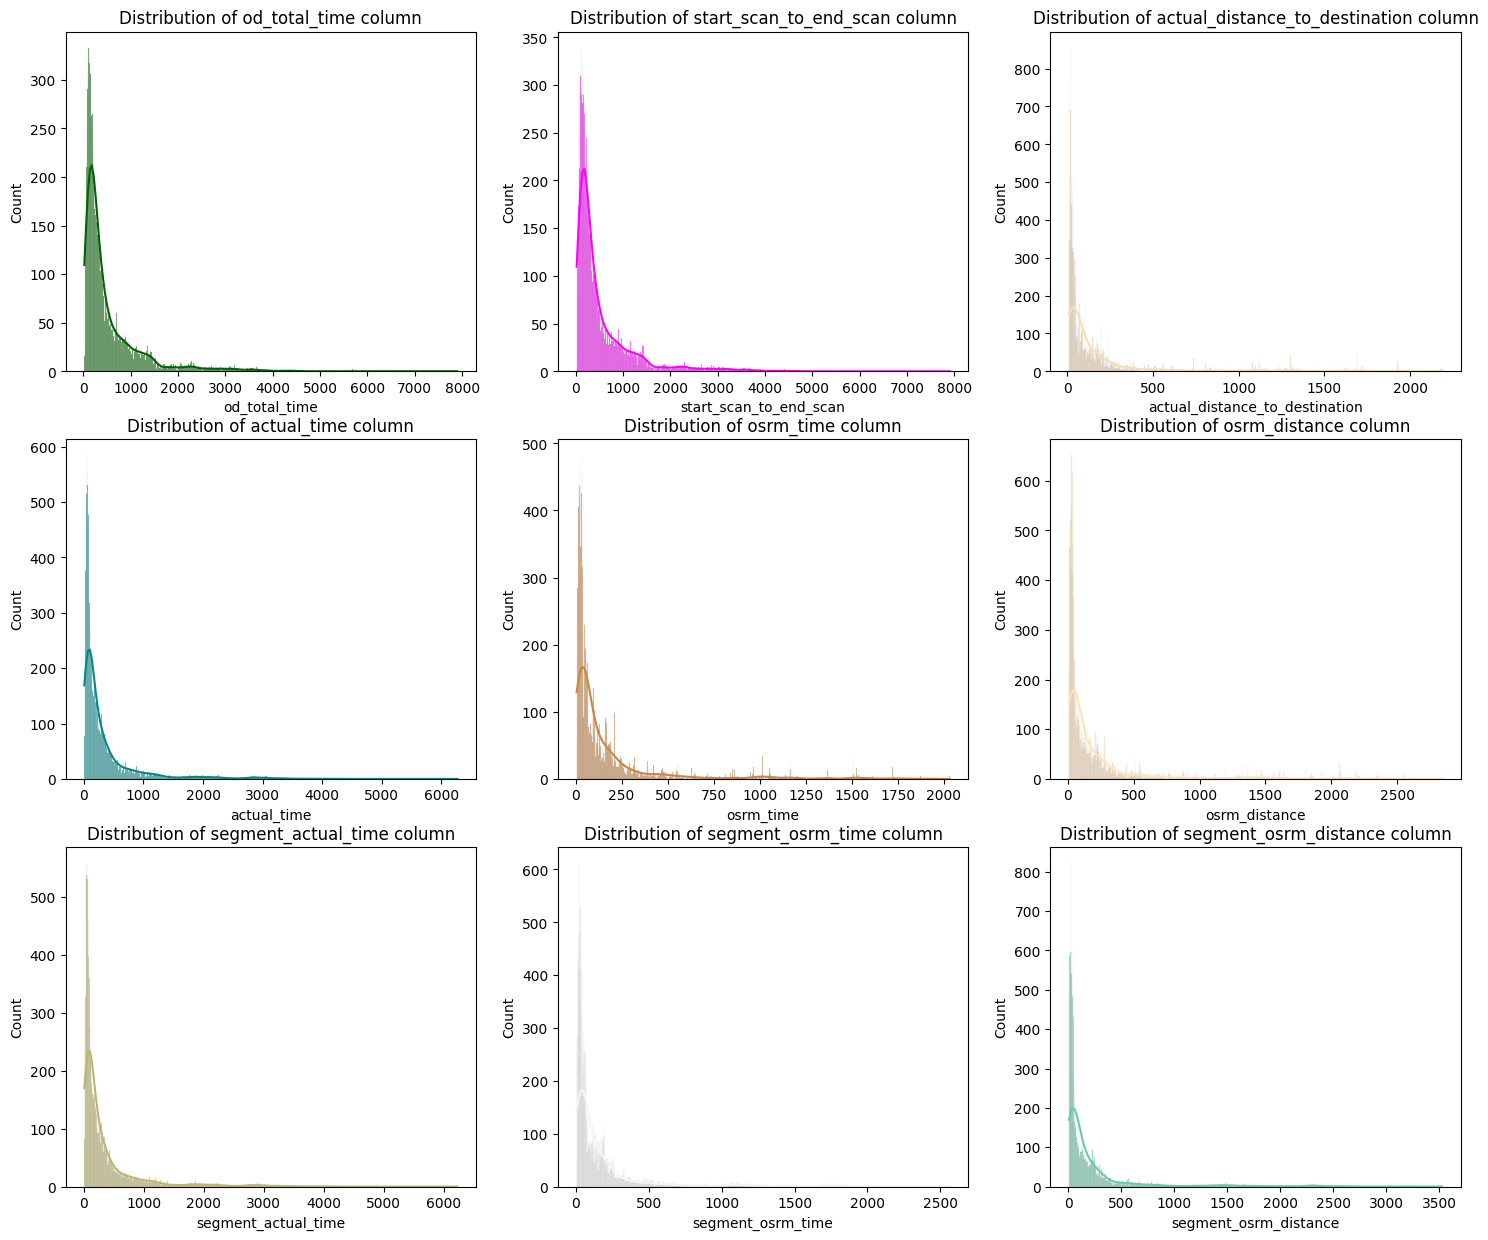

In [ ]:
plt.figure(figsize = (18, 15))
for i in range(len(numerical_columns)):
    plt.subplot(3, 3, i + 1)
    clr = np.random.choice(list(mpl.colors.cnames))
    sns.histplot(df2[numerical_columns[i]], bins = 1000, kde = True, color = clr)
    plt.title(f"Distribution of {numerical_columns[i]} column")


The provided plots suggest that the numerical data in all columns exhibit a right-skewed distribution.

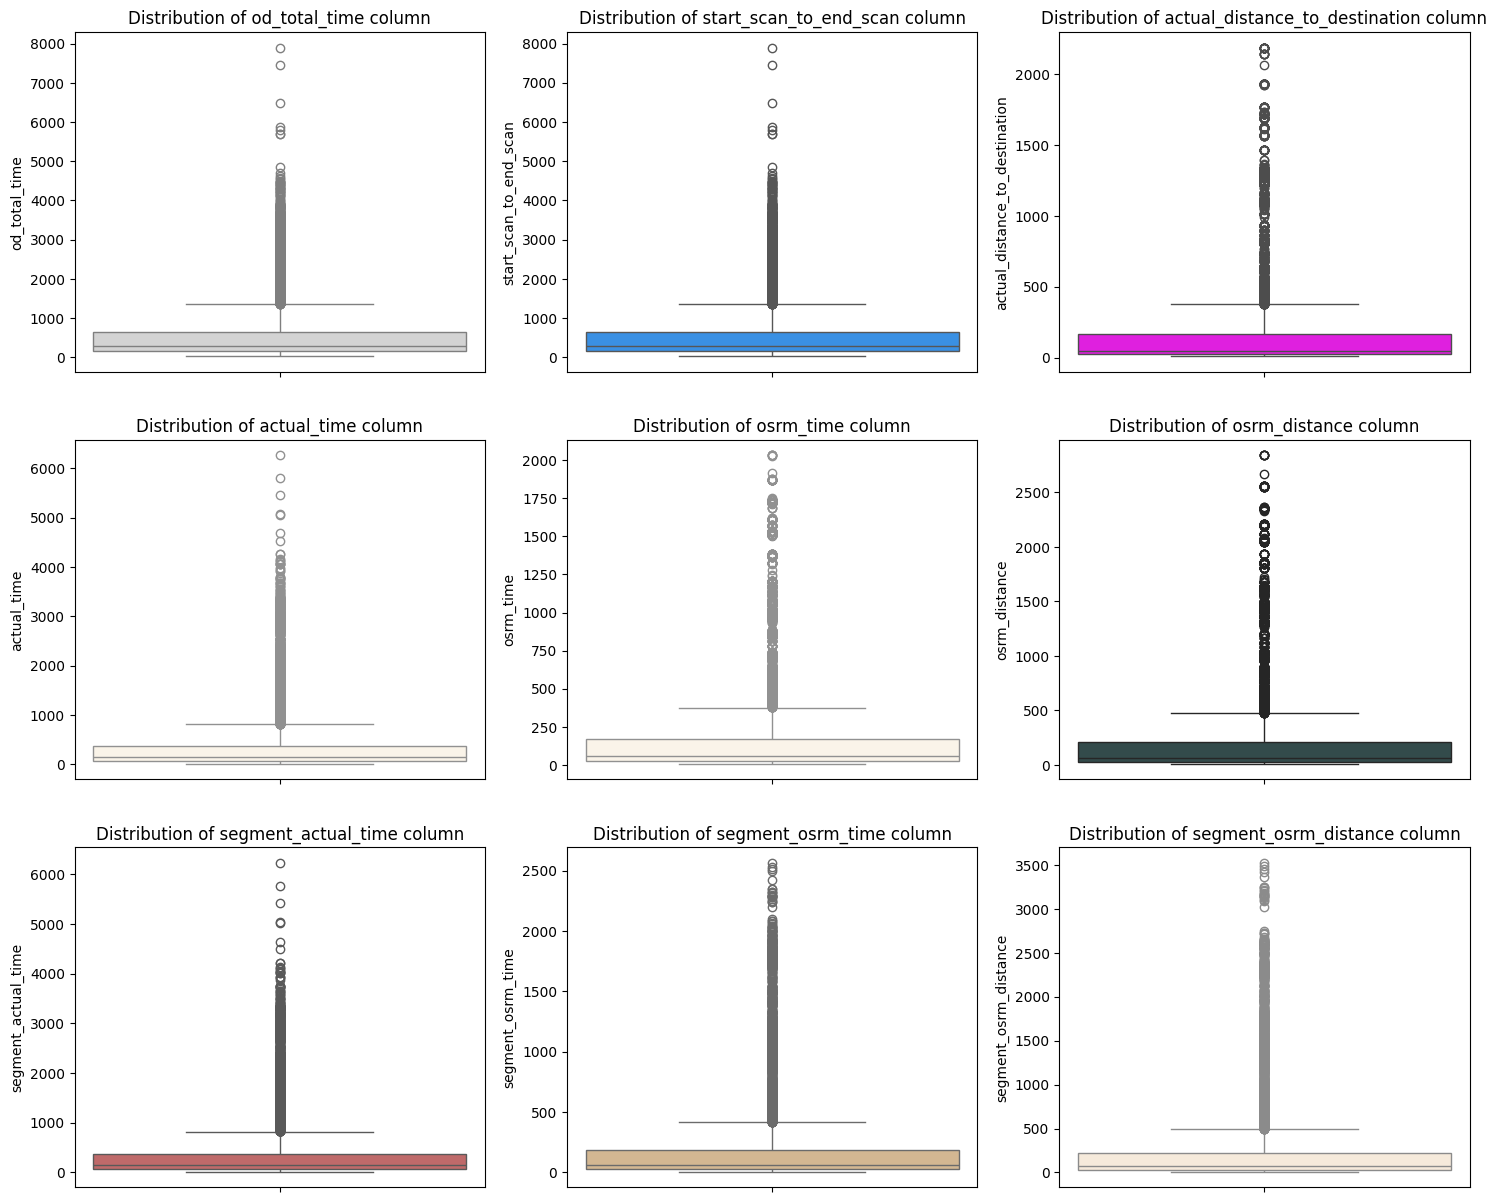

In [ ]:
plt.figure(figsize = (18, 15))
for i in range(len(numerical_columns)):
    plt.subplot(3, 3, i + 1)
    clr = np.random.choice(list(mpl.colors.cnames))
    sns.boxplot(df2[numerical_columns[i]], color = clr)
    plt.title(f"Distribution of {numerical_columns[i]} column")
    plt.plot()


In [ ]:
# Detecting Outliers

for i in numerical_columns:
    Q1 = np.quantile(df2[i], 0.25)
    Q3 = np.quantile(df2[i], 0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    outliers = df2.loc[(df2[i] < LB) | (df2[i] > UB)]
    print('Column :', i)
    print(f'Q1 : {Q1}')
    print(f'Q3 : {Q3}')
    print(f'IQR : {IQR}')
    print(f'LB : {LB}')
    print(f'UB : {UB}')
    print(f'Number of outliers : {outliers.shape[0]}')
    print('----------------------------------')

Column : od_total_time
Q1 : 149.93
Q3 : 638.2
IQR : 488.27000000000004
LB : -582.4750000000001
UB : 1370.605
Number of outliers : 1266
----------------------------------
Column : start_scan_to_end_scan
Q1 : 149.0
Q3 : 637.0
IQR : 488.0
LB : -583.0
UB : 1369.0
Number of outliers : 1267
----------------------------------
Column : actual_distance_to_destination
Q1 : 22.837238311767578
Q3 : 164.5832061767578
IQR : 141.74596786499023
LB : -189.78171348571777
UB : 377.20215797424316
Number of outliers : 1449
----------------------------------
Column : actual_time
Q1 : 67.0
Q3 : 370.0
IQR : 303.0
LB : -387.5
UB : 824.5
Number of outliers : 1643
----------------------------------
Column : osrm_time
Q1 : 29.0
Q3 : 168.0
IQR : 139.0
LB : -179.5
UB : 376.5
Number of outliers : 1517
----------------------------------
Column : osrm_distance
Q1 : 30.81920051574707
Q3 : 208.47500610351562
IQR : 177.65580558776855
LB : -235.66450786590576
UB : 474.95871448516846
Number of outliers : 1524
-------------


In sample data, outliers may genuinely represent unique cases. Thus, it's advisable to eliminate outliers only when justified. Certain outliers reflect inherent variations within the population and should remain unaltered in the dataset.

**one-hot encoding of categorical variables**

In [ ]:
# Get value counts before one-hot encoding

df2['route_type'].value_counts()

route_type
Carting    8908
FTL        5909
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df2['route_type'] = label_encoder.fit_transform(df2['route_type'])

In [ ]:
# Get value counts after one-hot encoding

df2['route_type'].value_counts()

route_type
0    8908
1    5909
Name: count, dtype: int64

In [ ]:
# Get value counts of categorical variable 'data' before one-hot encoding

df2['data'].value_counts()

data
training    10654
test         4163
Name: count, dtype: int64

In [ ]:
label_encoder = LabelEncoder()
df2['data'] = label_encoder.fit_transform(df2['data'])

In [ ]:
# Get value counts after one-hot encoding

df2['data'].value_counts()

data
1    10654
0     4163
Name: count, dtype: int64

**Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

[]

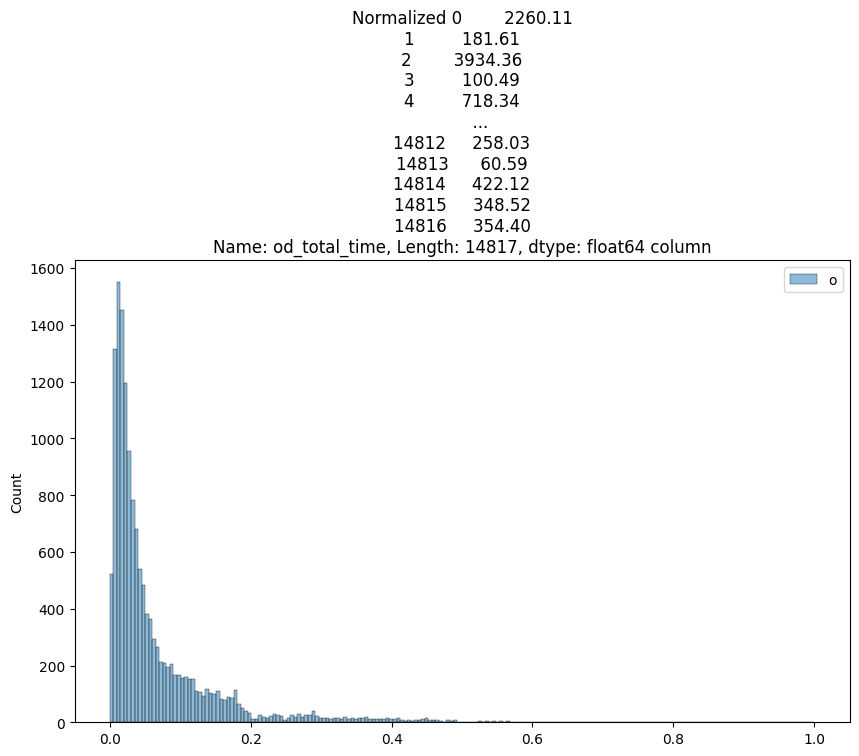

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['od_total_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['od_total_time']} column")
plt.legend('od_total_time')
plt.plot()

[]

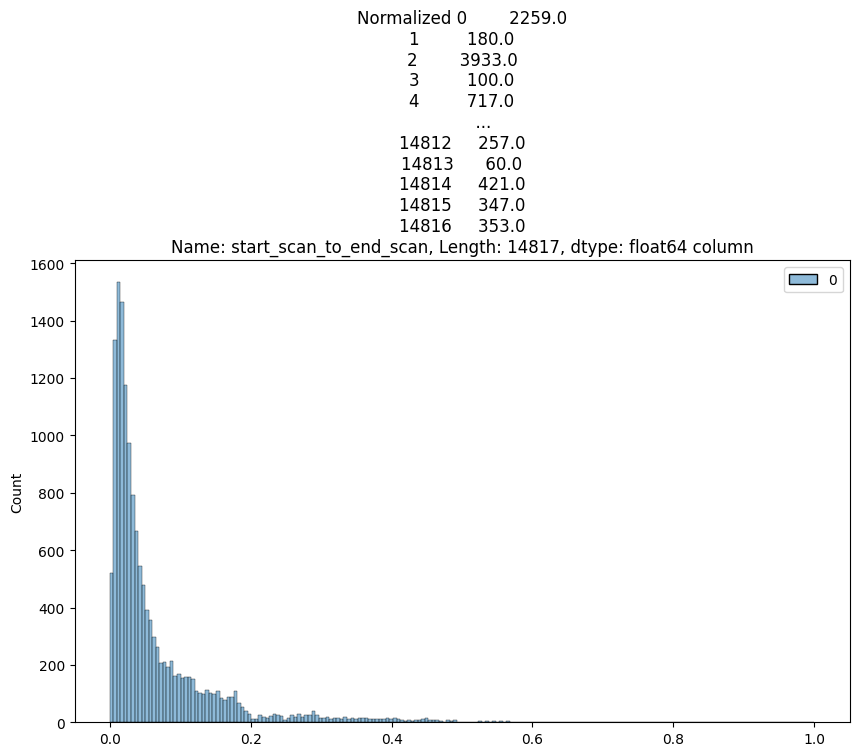

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['start_scan_to_end_scan'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['start_scan_to_end_scan']} column")
plt.plot()

[]

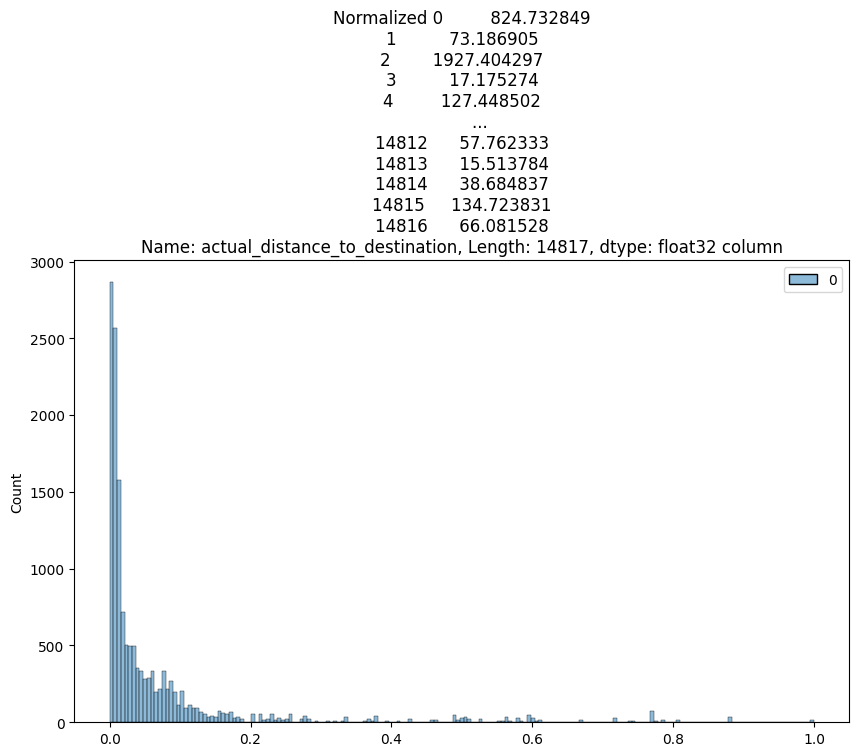

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['actual_distance_to_destination'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['actual_distance_to_destination']} column")
plt.plot()

[]

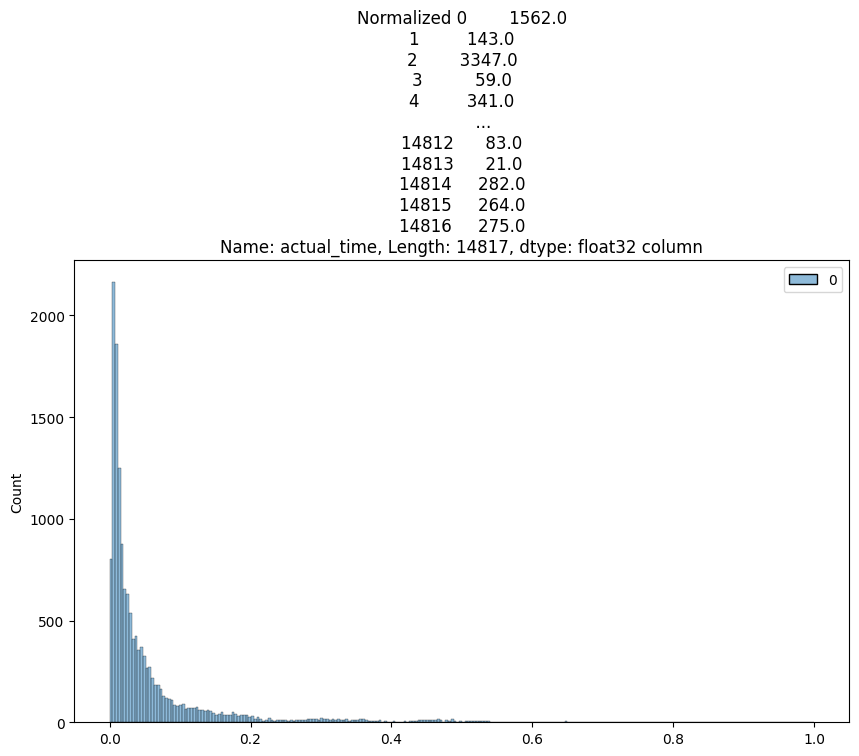

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['actual_time']} column")
plt.plot()

[]

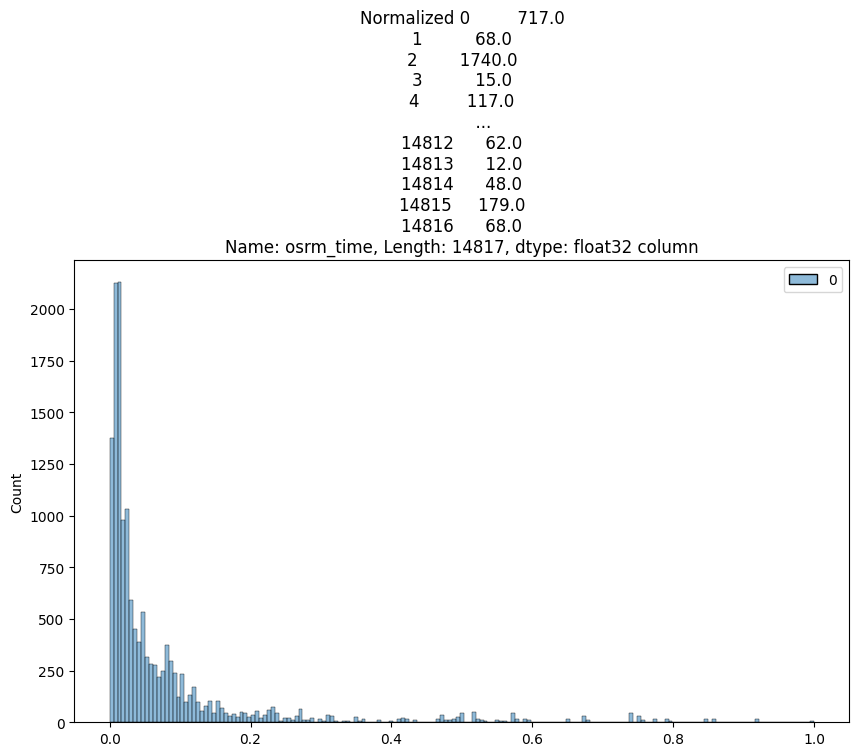

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['osrm_time']} column")
plt.plot()

[]

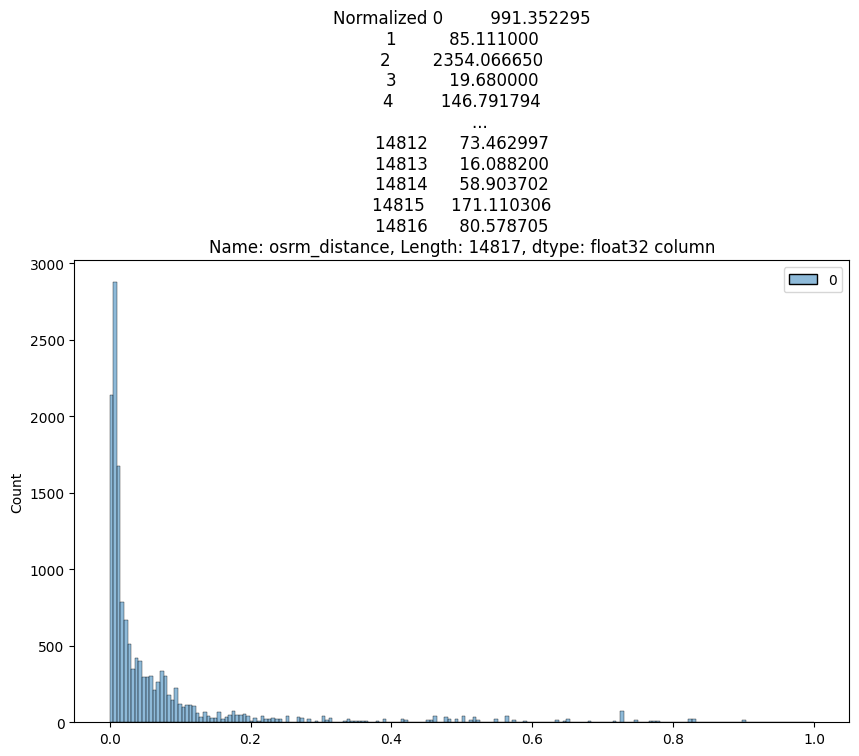

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['osrm_distance']} column")
plt.plot()

[]

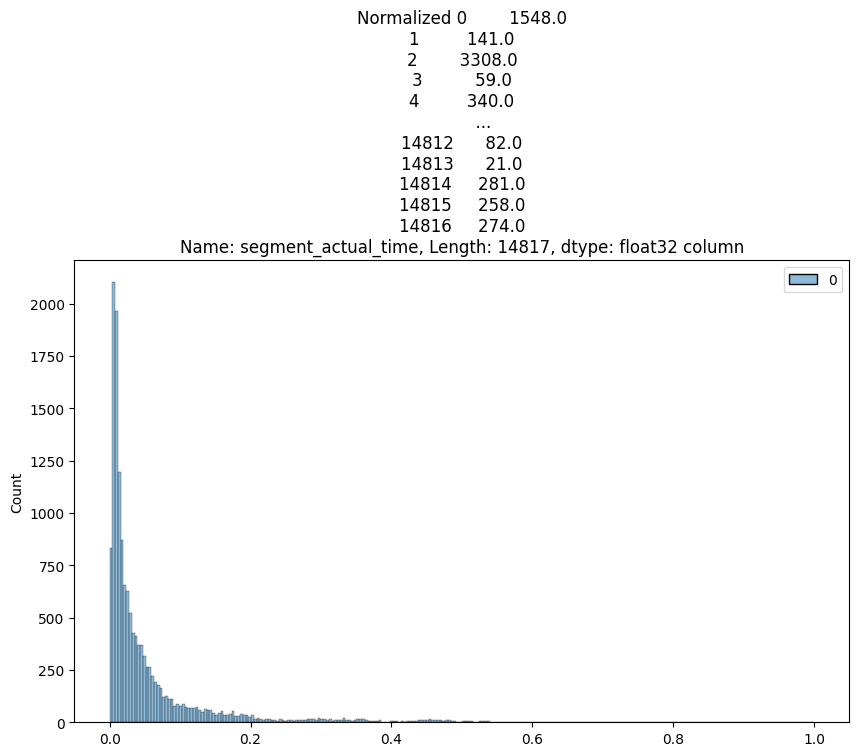

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['segment_actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['segment_actual_time']} column")
plt.plot()


[]

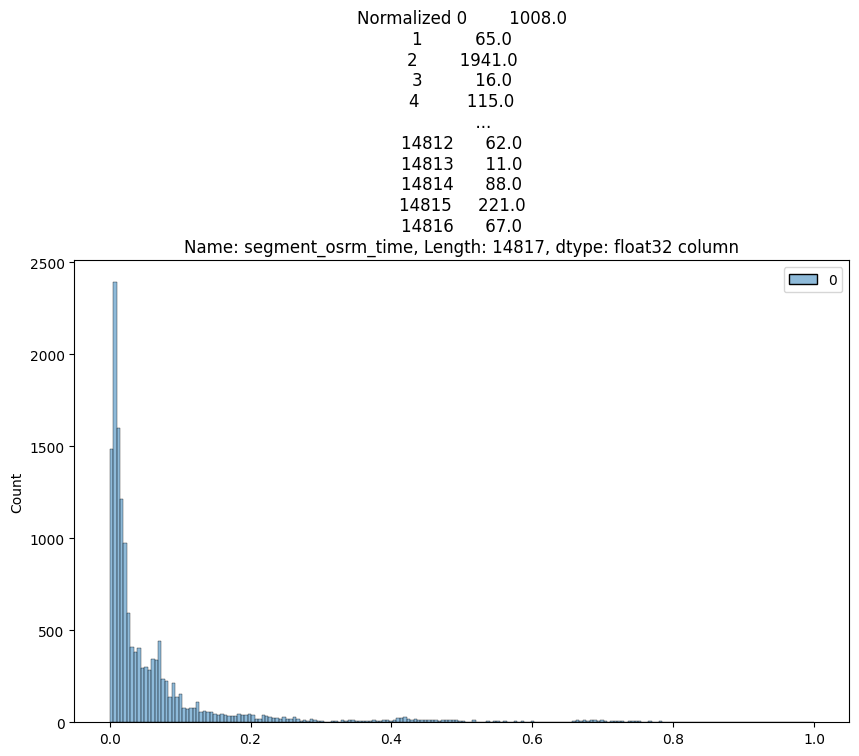

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['segment_osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['segment_osrm_time']} column")
plt.plot()

[]

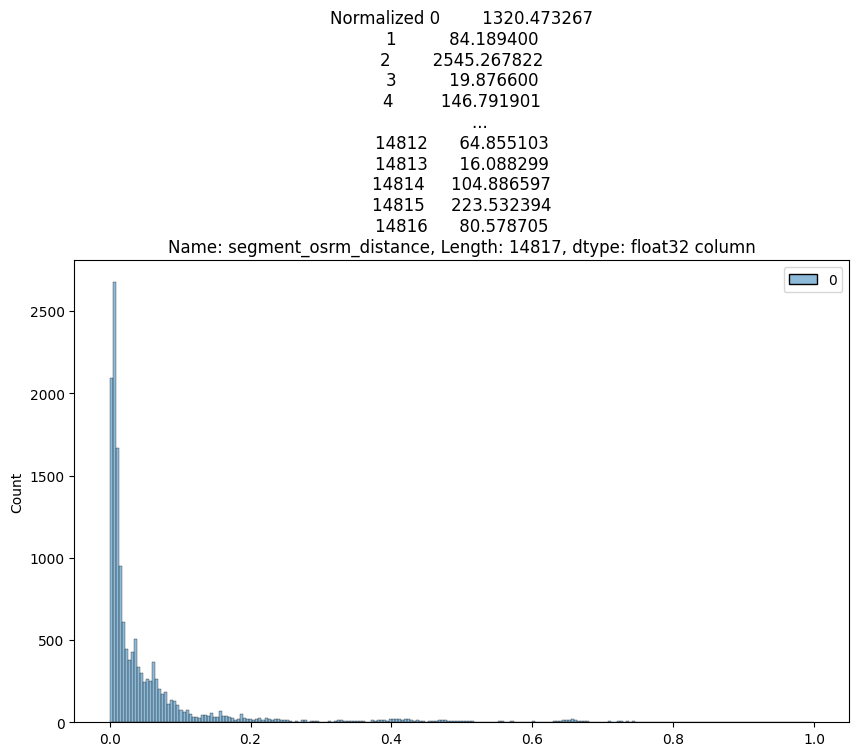

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['segment_osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['segment_osrm_distance']} column")
plt.plot()

**Column Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler

[]

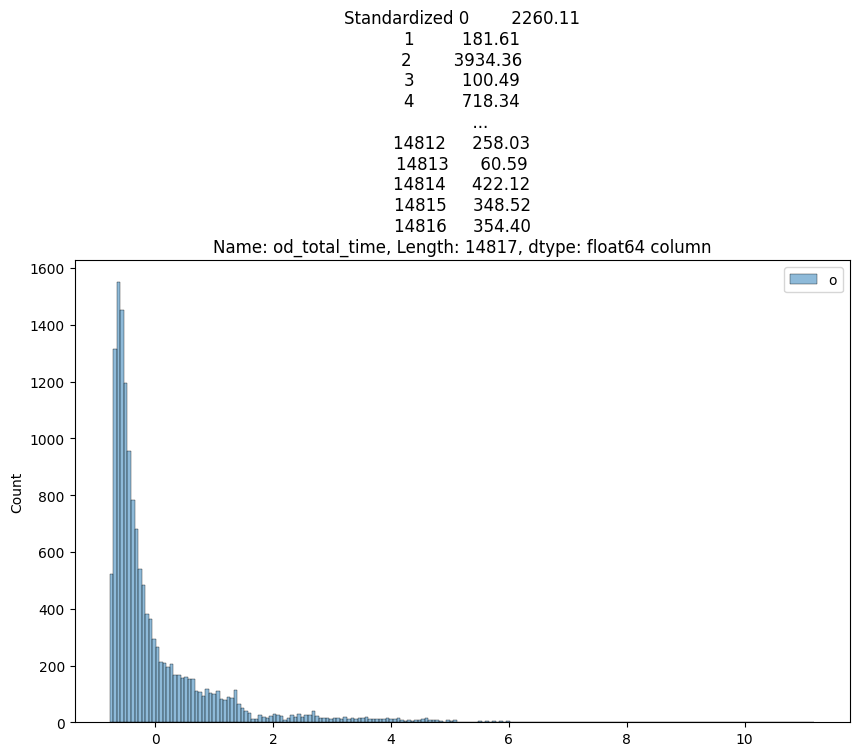

In [ ]:
plt.figure(figsize = (10, 6))
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(df2['od_total_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['od_total_time']} column")
plt.legend('od_total_time')
plt.plot()

[]

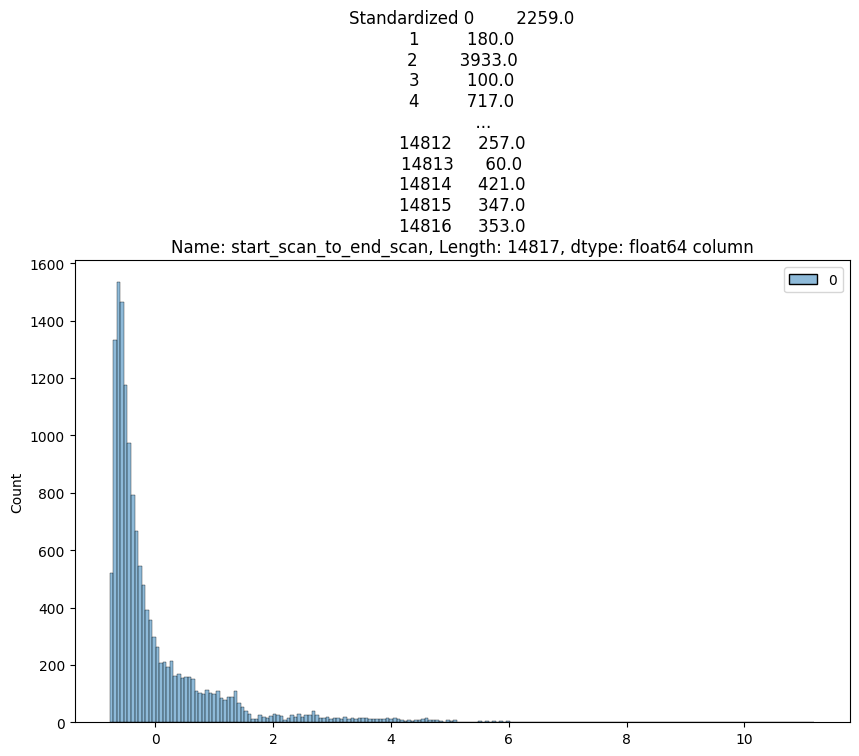

In [ ]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['start_scan_to_end_scan'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['start_scan_to_end_scan']} column")
plt.plot()

[]

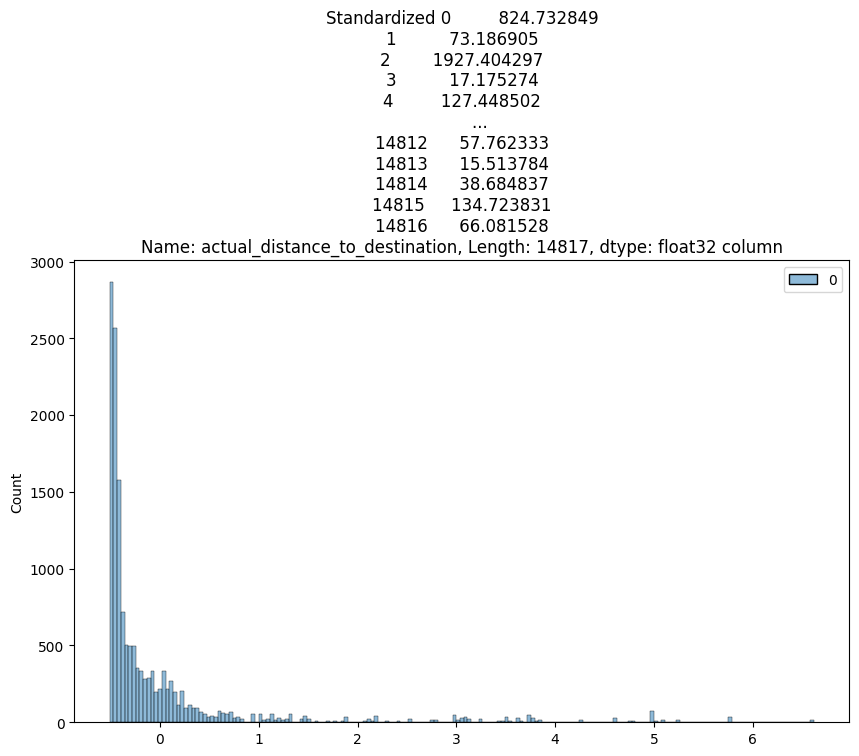

In [ ]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['actual_distance_to_destination'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['actual_distance_to_destination']} column")
plt.plot()

[]

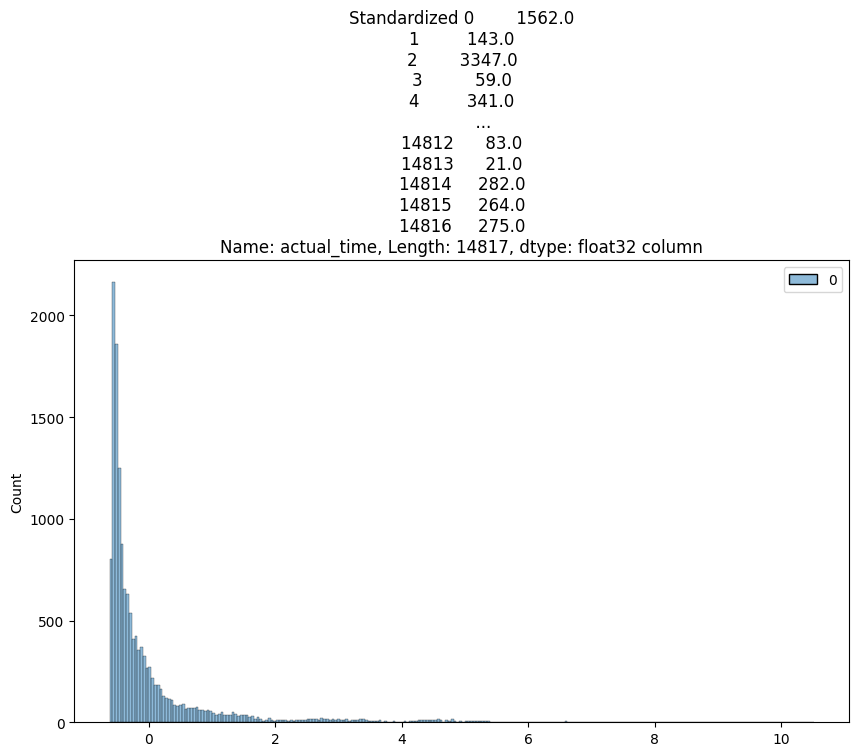

In [ ]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['actual_time']} column")
plt.plot()

[]

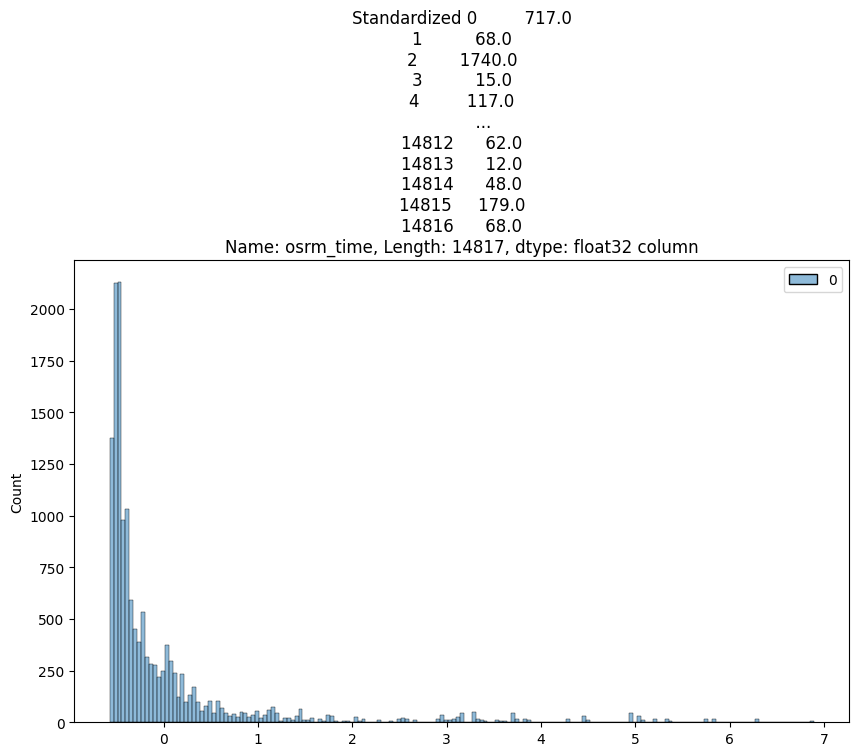

In [ ]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['osrm_time']} column")
plt.plot()

[]

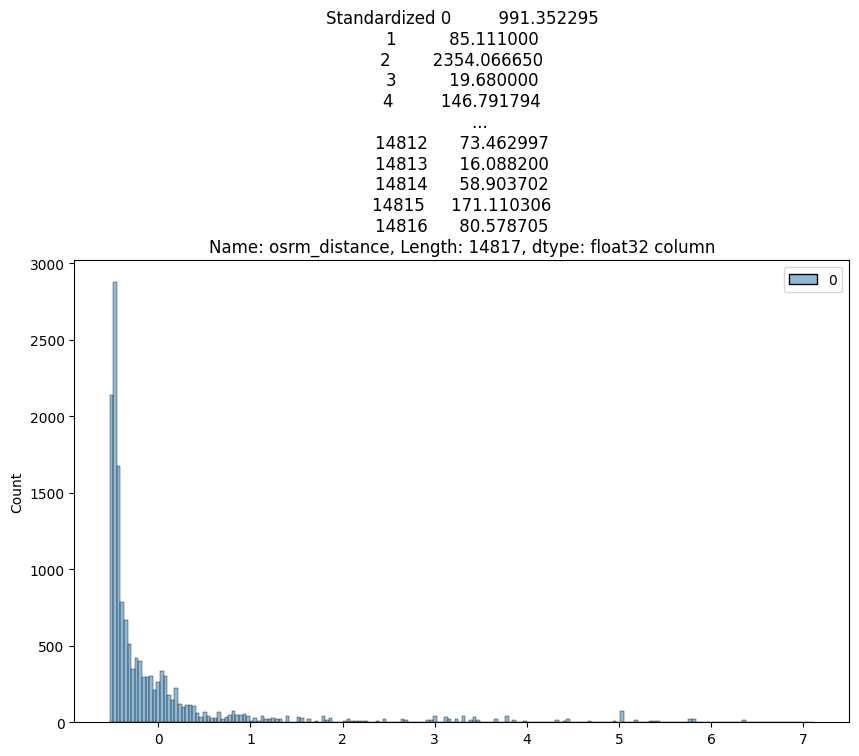

In [ ]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['osrm_distance']} column")
plt.plot()

[]

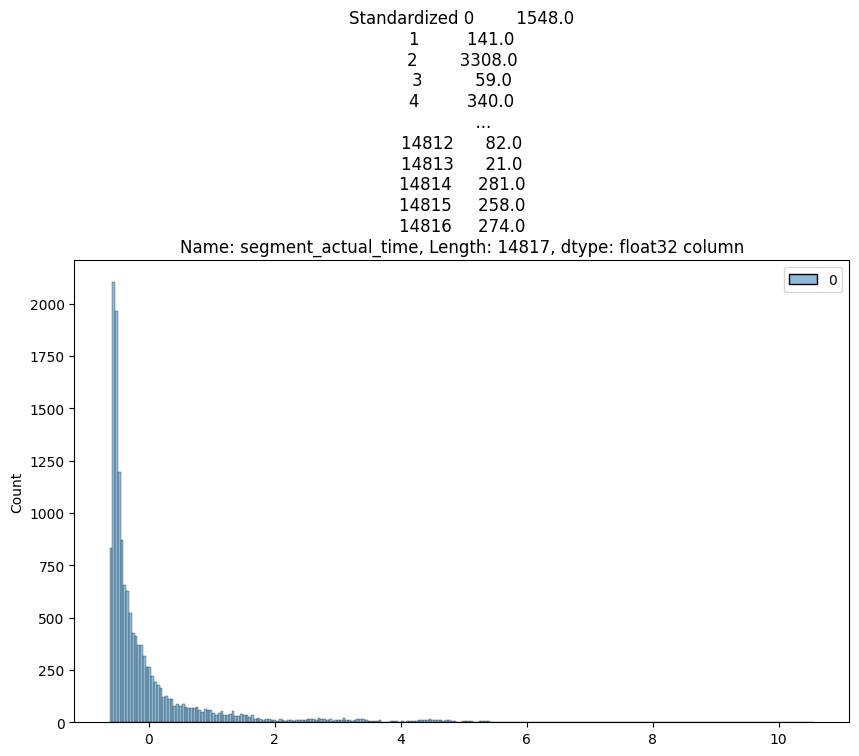

In [ ]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['segment_actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['segment_actual_time']} column")
plt.plot()

[]

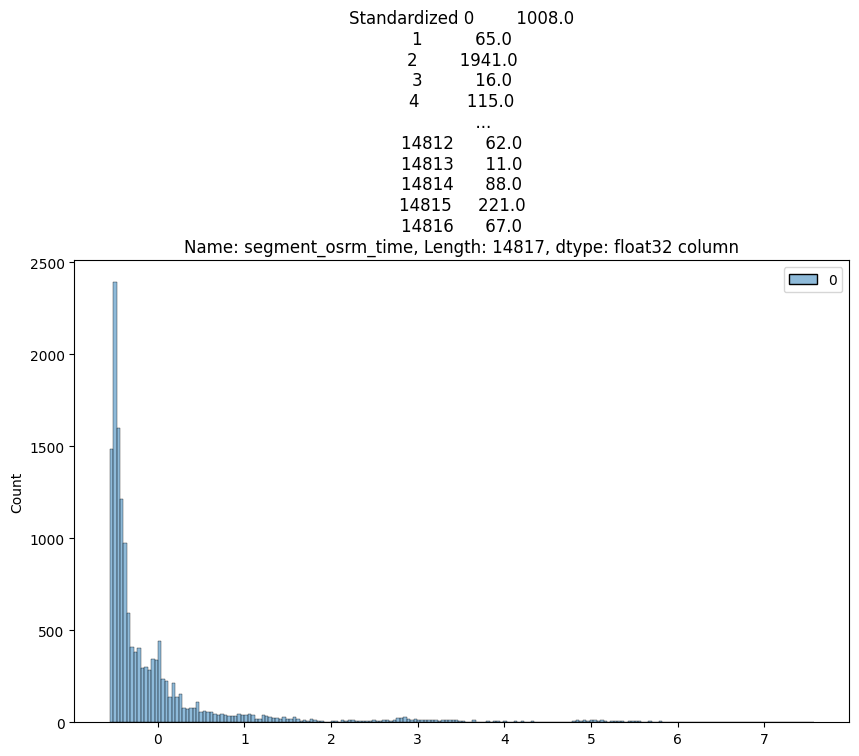

In [ ]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['segment_osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['segment_osrm_time']} column")
plt.plot()

[]

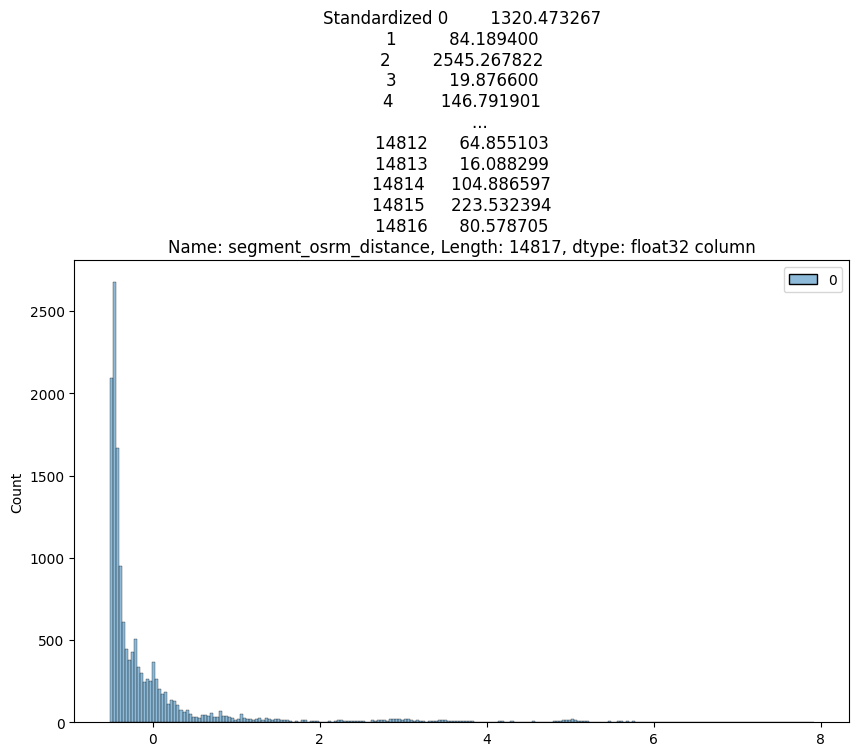

In [ ]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['segment_osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['segment_osrm_distance']} column")
plt.plot()

**Insights**

- The dataset covers the time span from '2018-09-12 00:00:16' to '2018-10-08 03:00:24'.
  
- It includes approximately 14,817 unique trip IDs, originating from 1,508 distinct source centers and heading towards 1,481 unique destination centers. These trips span across 690 different source cities and 806 destination cities.

- Predominantly, the dataset leans towards training rather than testing.

- The most prevalent route type observed is Carting.

- Notably, there are 14 unique location IDs absent from the dataset.

- Trip volume tends to increase after noon, peaking at 10 P.M., before tapering off.

- The highest number of trips occurred during the 38th week.

- Mid-month sees a surge in orders, suggesting a tendency among customers to place more orders during this period.

- Maharashtra, Karnataka, Haryana, Tamil Nadu, and Telangana are the states from which the majority of orders originate.

- Mumbai tops the list for the maximum number of trip origins, followed by Gurgaon Delhi, Bengaluru, and Bhiwandi, indicating a strong seller presence in these cities.

- Maharashtra leads in terms of trip destinations, followed by Karnataka, Haryana, Tamil Nadu, and Uttar Pradesh, suggesting a significant volume of orders in these states.

- Similarly, Mumbai, Bengaluru, Gurgaon, Delhi, and Chennai are the top destinations for trip ends, indicating high order placement in these cities.

- Primary order destinations include cities like Bengaluru, Mumbai, Gurgaon, Bangalore, and Delhi.

- The features 'start_scan_to_end_scan' and 'od_total_time' (created feature) exhibit statistical similarity.

- Conversely, 'actual_time' and 'osrm_time' are statistically different.

- 'Start_scan_to_end_scan' and 'segment_actual_time' are statistically similar.

- Notably, 'osrm_distance' and 'segment_osrm_distance' exhibit statistical dissimilarity.

- Similarly, 'osrm_time' and 'segment_osrm_time' are not statistically equivalent.


**Recommendations**

- Enhancements are needed in the OSRM trip planning system to address discrepancies experienced by transporters, particularly when the routing engine is configured for optimal results.

- To improve delivery time predictions and enhance customer convenience, discrepancies between osrm_time and actual_time must be minimized.

- Differences between osrm distance and the actual distance covered suggest potential issues, such as delivery personnel deviating from predefined routes or inaccuracies in OSRM's route predictions. Investigating these disparities is crucial to prevent delivery delays.

- Priority regions for orders include Maharashtra, Karnataka, Haryana, and Tamil Nadu. Further development of existing corridors in these areas is recommended to improve market penetration.

- Profiling customers from Maharashtra, Karnataka, Haryana, Tamil Nadu, and Uttar Pradesh is essential to understand the reasons for the concentration of orders from these states and to improve their purchasing and delivery experiences.

- Considering state-specific factors such as heavy traffic and challenging terrain can aid in strategic planning to meet demand, especially during peak festival seasons.

- Evaluating states with lower order volumes is necessary to understand the reasons for lower purchasing activity and to develop strategies for increasing penetration into these regions.